
# Configuring and Training a Multi-layer Perceptron (MLP) in SciKit-Learn

**(Notebook prepared by Pr Fabien MOUTARDE, Center for Robotics, MINES ParisTech, PSL Université Paris)**


## 1. Understand and experiment on a VERY simple classification problem

[1 0 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 0
 0 1 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 0
 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0
 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1
 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1
 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1
 0 0 1 0 1 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1
 0 1 1 0 0 1 1 1 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0
 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0
 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1 1 0
 1 1 1 1 0 0 0 0 1 0 1 0 

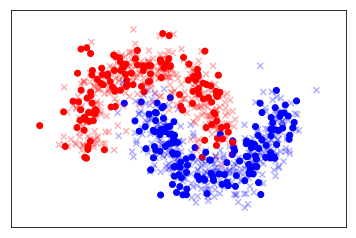

In [ ]:
###########################################################################################
# Author: Pr Fabien MOUTARDE, Center for Robotics, MINES ParisTech, PSL Research University
###########################################################################################

%matplotlib inline

import numpy as np

from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons

# Create artificial dataset (classification problem within 2 classes within R^2 input space)
X, y = make_moons(n_samples=900, noise=0.2, random_state=0)
print (y)
# Preprocess dataset, and split into training and test part
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

# Encode class labels as binary vector (with exactly ONE bit set to 1, and all others to 0)
Y_train_OneHot = np.eye(2)[y_train]
Y_test_OneHot = np.eye(2)[y_test]

# Print beginning of training dataset (for verification)
print("Number of training examples = ", y_train.size)
print()
print("  first ", round(y_train.size/10), "training examples" )
print("[  Input_features  ]     [Target_output]")
for i in range( int(round(y_train.size/10) )):
    print( X_train[i], Y_train_OneHot[i])

# Plot training+testing dataset
################################
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

# Plot the training points...
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
#   ...and testing points
plt.scatter(X_test[:, 0], X_test[:, 1], marker='x', c=y_test, cmap=cm_bright, alpha=0.3)

# Define limits/scale of plot axis
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xticks(())
plt.yticks(())

# Actually render the plot
print()
print("PLOT OF TRAINING EXAMPLES AND TEST DATASET")
print("Datasets: circles=training, light-crosses=test [and red=class_1, blue=class_2]")

plt.ioff()
plt.show()

**Building, training and evaluating a simple Neural Network classifier (Multi Layer Perceptron, MLP)**

The SciKit-learn class for MLP is **MLPClassifier**.
Please first read the [*MLPClassifier documentation*](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifierMLPClassifier); to understand all parameters of the constructor.
You can then begin by running the code block below, in which an initial set of parameter values has been chosen.
** YOU MAY NEED TO CHANGE AT LEAST THE NUMBER OF HIDDEN NEURONS IN ORDER TO BE ABLE TO LEARN A CORRECT CLASSIFIER**


In [1]:
#########################################################
# Create and parametrize a MLP neural network classifier
#########################################################
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(10,10), activation='relu', solver='adam', 
                    alpha=0.001, batch_size=4, learning_rate='adaptive', learning_rate_init=0.003, 
                    power_t=0.5, max_iter=100, shuffle=True, random_state=11, tol=0.0000001, 
                    verbose=True, warm_start=False, momentum=0.8, nesterovs_momentum=True, 
                    early_stopping=False, validation_fraction=0.2, 
                    beta_1=0.8, beta_2=0.999, epsilon=1e-08)
print(clf)

# Train the MLP classifier on training dataset
clf.fit(X_train, Y_train_OneHot)
print()
print ('here')
# Evaluate acuracy on test data
score = clf.score(X_test,Y_test_OneHot)
print("Acuracy (on test set) = ", score)


MLPClassifier(activation='relu', alpha=0.001, batch_size=4, beta_1=0.8,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10), learning_rate='adaptive',
       learning_rate_init=0.003, max_iter=100, momentum=0.8,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=11, shuffle=True, solver='adam', tol=1e-07,
       validation_fraction=0.2, verbose=True, warm_start=False)


NameError: name 'X_train' is not defined

**Visualize the learnt boundary between classes in (2D) input space**

** THIS SHOULD HELP YOU UNDERSTAND WHAT HAPPENS IF THERE ARE NOT ENOUGH HIDDEN NEURONS**

Optional: add code that visualises on the same plot the straight lines corresponding to each hidden neuron (you will need to dig into MLPClassifier documentation to find the 2 input weights and the bias of each hidden neuron). YOU SHOULD NOTICE THAT THE CLASSIFICATION BOUNDARY IS SOME INTERPOLATION BETWEEN THOSE STRAIGHT LINES.

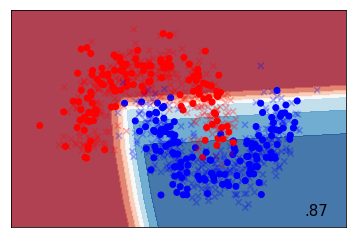

In [59]:
# Plot the decision boundary. For that, we will assign a color to each
#   point in the mesh [x_min, x_max]x[y_min, y_max].

h = .02  # Step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

# Compute class probabilities for each mesh point
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
# and testing points
plt.scatter(X_test[:, 0], X_test[:, 1], marker='x', c=y_test, cmap=cm_bright, alpha=0.3)

# Axis ranges 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

# Print acuracy on plot
plt.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')

# Actually plot
plt.ioff()
plt.show()


Now, **check, by changing MLPClassifier parameters above and then rerunning training+eval+plot, the impact of main learning hyper-parameters:**
- **number of neurons on hidden layer**: if too small, an acceptable boundary cannot be obtained
- **number of iterations**: if too small, the training does not finish to converge; if too large, overfitting may occur
- **learning_rate, momentum, and solver**
- **impact of L2 weight regularization term (alpha)**


### **Finally, use grid-search and cross-validation to find optimal set of learning hyper-parameters (see code below).**

**Because the values of learning hyper-parameters can DRASTICALLY change the outcome of training, it is ESSENTIAL THAT YOU ALWAYS MAKE SURE TO USE OPTIMAL VALUES FOR THE ALGORITHM HYPER-PARAMETERS. And this ABSOLUTELY NEEDS TO BE DONE USING "VALIDATION", either with a validation set separate from the training set, or using cross-validation. CROSS-VALIDATION is the MOST ROBUST WAY OF FINDING OPTIMIZED HYPER-PARAMETRS VALUES, and the GridSearchCV function of SciKit-Learn makes this rather straightforward.**

**WARNING:** GridSearchCV launches many successive training sessions, so **can be rather long to execute if you compare too many combinations**

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report 

from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(random_state=0)
mlp.fit(X_train, y_train)


NameError: name 'Y_train_OneHot' is not defined

## 2. WORK ON A REALISTIC DATASET:  A SIMPLIFIED HANDWRITTEN DIGITS DATASET

**Please FIRST READ the [*Digits DATASET DESCRIPTION*](http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html#sphx-glr-auto-examples-datasets-plot-digits-last-image-py).**
In this classification problem, there are 10 classes, with a total of 1797 examples (each one being a 64D vector corresponding to an 8x8 pixmap). 

**Assignment #1: find out what learning hyper-parameters should be modified in order to obtain a satisfying MLP digits classifier**

**Assignment #2: modify the code below to use cross-validation and find best training hyper-parameters and MLP classifier you can for this handwritten digits classification task.**

**Assignment #3: plot the first layer of weights as images (see explanations and example code at http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html)**


Number_of-examples =  1797

 Plot of first example
CLOSE PLOT WINDOW TO CONTINUE


<Figure size 432x288 with 0 Axes>

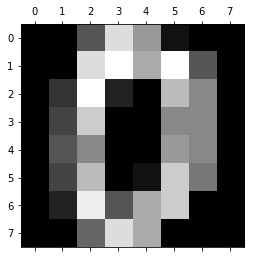

MLPClassifier(activation='relu', alpha=0.0001, batch_size=4, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.01, max_iter=9, momentum=0.8,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=11, shuffle=True, solver='adam', tol=1e-05,
       validation_fraction=0.1, verbose=True, warm_start=False)


Iteration 1, loss = 2.60245669
Iteration 2, loss = 1.91282255
Iteration 3, loss = 1.56894408


Iteration 4, loss = 1.38931224


Iteration 5, loss = 1.23724866


Iteration 6, loss = 1.12925272
Iteration 7, loss = 1.05757699
Iteration 8, loss = 0.93233232


Iteration 9, loss = 0.82826293
Iteration 10, loss = 0.77296109
Iteration 11, loss = 0.72955845
Iteration 12, loss = 0.68255663
Iteration 13, loss = 0.67662542
Iteration 14, loss = 0.64930542


Iteration 15, loss = 0.60087464
Iteration 16, loss = 0.57953023
Iteration 17, loss = 0.57531636
Iteration 18, loss = 0.55561014
Iteration 19, loss = 0.52538684
Iteration 20, loss = 0.50759061


Iteration 21, loss = 0.47210162
Iteration 22, loss = 0.45006489
Iteration 23, loss = 0.42632562
Iteration 24, loss = 0.41497385
Iteration 25, loss = 0.42646829
Iteration 26, loss = 0.39783063


Iteration 27, loss = 0.38049660
Iteration 28, loss = 0.37316252
Iteration 29, loss = 0.38870030
Iteration 30, loss = 0.35568552
Iteration 31, loss = 0.36141007
Iteration 32, loss = 0.33759916


Iteration 33, loss = 0.34521178
Iteration 34, loss = 0.38053737
Iteration 35, loss = 0.33090776
Iteration 36, loss = 0.30507417
Iteration 37, loss = 0.31713021
Iteration 38, loss = 0.29534978


Iteration 39, loss = 0.30995652
Iteration 40, loss = 0.31147022
Iteration 41, loss = 0.30085968
Iteration 42, loss = 0.28706768
Iteration 43, loss = 0.30624299
Iteration 44, loss = 0.27105256


Iteration 45, loss = 0.31466281
Iteration 46, loss = 0.27916413
Iteration 47, loss = 0.28614175
Iteration 48, loss = 0.27177687
Iteration 49, loss = 0.26917394
Iteration 50, loss = 0.24666177


/Users/yanis/venv/ApprentissageArtificiel/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 2.58793954
Iteration 2, loss = 1.82743832
Iteration 3, loss = 1.59096569
Iteration 4, loss = 1.45004459
Iteration 5, loss = 1.34910144
Iteration 6, loss = 1.28114558


Iteration 7, loss = 1.25066898
Iteration 8, loss = 1.19814203
Iteration 9, loss = 1.16135246
Iteration 10, loss = 1.08957136
Iteration 11, loss = 1.03766446
Iteration 12, loss = 0.99675803


Iteration 13, loss = 0.96167176
Iteration 14, loss = 0.91014208
Iteration 15, loss = 0.86330666
Iteration 16, loss = 0.82615413
Iteration 17, loss = 0.78488877
Iteration 18, loss = 0.75672856


Iteration 19, loss = 0.73970986
Iteration 20, loss = 0.68557741
Iteration 21, loss = 0.66743104
Iteration 22, loss = 0.65088454
Iteration 23, loss = 0.62550409
Iteration 24, loss = 0.59345725


Iteration 25, loss = 0.61581389
Iteration 26, loss = 0.57511610
Iteration 27, loss = 0.60454010
Iteration 28, loss = 0.58029093
Iteration 29, loss = 0.55161795
Iteration 30, loss = 0.54185358


Iteration 31, loss = 0.50783475
Iteration 32, loss = 0.53501058
Iteration 33, loss = 0.52843692
Iteration 34, loss = 0.52378368
Iteration 35, loss = 0.50624157
Iteration 36, loss = 0.51810350


Iteration 37, loss = 0.52886371
Iteration 38, loss = 0.52265997
Iteration 39, loss = 0.49855609
Iteration 40, loss = 0.51432216
Iteration 41, loss = 0.48674705
Iteration 42, loss = 0.48153983


Iteration 43, loss = 0.47046772
Iteration 44, loss = 0.50041356
Iteration 45, loss = 0.47419660
Iteration 46, loss = 0.46960825
Iteration 47, loss = 0.45511665
Iteration 48, loss = 0.47008843


Iteration 49, loss = 0.45187837
Iteration 50, loss = 0.46371752
Iteration 1, loss = 2.73507141
Iteration 2, loss = 2.14691012
Iteration 3, loss = 1.98259582
Iteration 4, loss = 1.76971636


/Users/yanis/venv/ApprentissageArtificiel/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 5, loss = 1.67562640
Iteration 6, loss = 1.60792674
Iteration 7, loss = 1.52106660
Iteration 8, loss = 1.46686917
Iteration 9, loss = 1.42550943
Iteration 10, loss = 1.37914926


Iteration 11, loss = 1.33845552
Iteration 12, loss = 1.28510262
Iteration 13, loss = 1.22641936
Iteration 14, loss = 1.16812194
Iteration 15, loss = 1.13266255
Iteration 16, loss = 1.11113149


Iteration 17, loss = 1.08591517
Iteration 18, loss = 1.05264707
Iteration 19, loss = 1.01123192
Iteration 20, loss = 1.00959764


Iteration 21, loss = 1.01326665
Iteration 22, loss = 0.97561207
Iteration 23, loss = 0.96901634
Iteration 24, loss = 0.94402696


Iteration 25, loss = 0.97534165
Iteration 26, loss = 0.92804396
Iteration 27, loss = 0.91991732


Iteration 28, loss = 0.91208931
Iteration 29, loss = 0.91300208
Iteration 30, loss = 0.89989057
Iteration 31, loss = 0.89703898
Iteration 32, loss = 0.90969859


Iteration 33, loss = 0.87338320
Iteration 34, loss = 0.87594097
Iteration 35, loss = 0.85147384
Iteration 36, loss = 0.84617164


Iteration 37, loss = 0.83290257
Iteration 38, loss = 0.86309921
Iteration 39, loss = 0.82502687
Iteration 40, loss = 0.79846572
Iteration 41, loss = 0.81024263


Iteration 42, loss = 0.80412068
Iteration 43, loss = 0.78900182
Iteration 44, loss = 0.77699566
Iteration 45, loss = 0.78026256
Iteration 46, loss = 0.78152797


Iteration 47, loss = 0.79702446
Iteration 48, loss = 0.76233301
Iteration 49, loss = 0.78560771
Iteration 50, loss = 0.75917561
Iteration 1, loss = 2.28054766
Iteration 2, loss = 2.04248352


/Users/yanis/venv/ApprentissageArtificiel/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 3, loss = 1.96121029
Iteration 4, loss = 1.93301868
Iteration 5, loss = 1.89054109
Iteration 6, loss = 1.86087276
Iteration 7, loss = 1.89101810
Iteration 8, loss = 1.86124124


Iteration 9, loss = 1.84021949
Iteration 10, loss = 1.83205532
Iteration 11, loss = 1.83500885
Iteration 12, loss = 1.81013217


Iteration 13, loss = 1.77365635
Iteration 14, loss = 1.69820068
Iteration 15, loss = 1.67284849
Iteration 16, loss = 1.66463265
Iteration 17, loss = 1.68222723
Iteration 18, loss = 1.66011795


Iteration 19, loss = 1.68437440
Iteration 20, loss = 1.64139083
Iteration 21, loss = 1.61554423
Iteration 22, loss = 1.61738598
Iteration 23, loss = 1.64962129


Iteration 24, loss = 1.58051544
Iteration 25, loss = 1.59110506
Iteration 26, loss = 1.60636942
Iteration 27, loss = 1.60093289


Iteration 28, loss = 1.63202977
Iteration 29, loss = 1.58916147
Iteration 30, loss = 1.57312170
Iteration 31, loss = 1.58331950
Iteration 32, loss = 1.58518138
Iteration 33, loss = 1.55054783


Iteration 34, loss = 1.53598479
Iteration 35, loss = 1.54301174
Iteration 36, loss = 1.56744005
Iteration 37, loss = 1.59909353
Iteration 38, loss = 1.50943193
Iteration 39, loss = 1.54696607


Iteration 40, loss = 1.57121144
Iteration 41, loss = 1.53016516
Iteration 42, loss = 1.52495729
Iteration 43, loss = 1.60304463
Iteration 44, loss = 1.51923775
Iteration 45, loss = 1.57610010


Iteration 46, loss = 1.50175879
Iteration 47, loss = 1.55344684
Iteration 48, loss = 1.52688559
Iteration 49, loss = 1.50126745
Iteration 50, loss = 1.49934593
Iteration 1, loss = 2.34274244


/Users/yanis/venv/ApprentissageArtificiel/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 2, loss = 2.07139158
Iteration 3, loss = 1.99829488
Iteration 4, loss = 1.92447278
Iteration 5, loss = 1.90893065
Iteration 6, loss = 1.86245890
Iteration 7, loss = 1.85331971


Iteration 8, loss = 1.83857525
Iteration 9, loss = 1.80399185
Iteration 10, loss = 1.79422954
Iteration 11, loss = 1.78167085
Iteration 12, loss = 1.84176808
Iteration 13, loss = 1.78254921


Iteration 14, loss = 1.81051624
Iteration 15, loss = 1.72840573
Iteration 16, loss = 1.74693940
Iteration 17, loss = 1.72409310
Iteration 18, loss = 1.69673739
Iteration 19, loss = 1.70776551


Iteration 20, loss = 1.68900063
Iteration 21, loss = 1.67460100
Iteration 22, loss = 1.66317396
Iteration 23, loss = 1.67959897
Iteration 24, loss = 1.62937847
Iteration 25, loss = 1.66378308


Iteration 26, loss = 1.60496717
Iteration 27, loss = 1.66483256
Iteration 28, loss = 1.62302035
Iteration 29, loss = 1.62924357
Iteration 30, loss = 1.65198976
Iteration 31, loss = 1.60397101


Iteration 32, loss = 1.61622436
Iteration 33, loss = 1.61569588
Iteration 34, loss = 1.62391128
Iteration 35, loss = 1.59223288
Iteration 36, loss = 1.61015994
Iteration 37, loss = 1.62519734


Iteration 38, loss = 1.59876434
Iteration 39, loss = 1.63626386
Iteration 40, loss = 1.58861687
Iteration 41, loss = 1.59413404
Iteration 42, loss = 1.65131713


Iteration 43, loss = 1.66090375
Iteration 44, loss = 1.58690741
Iteration 45, loss = 1.60809781
Iteration 46, loss = 1.59848656
Iteration 47, loss = 1.69224910
Iteration 48, loss = 1.56950623


Iteration 49, loss = 1.58559552
Iteration 50, loss = 1.57031506
Iteration 1, loss = 2.44328684
Iteration 2, loss = 2.29533606
Iteration 3, loss = 2.09136296
Iteration 4, loss = 2.02607031


/Users/yanis/venv/ApprentissageArtificiel/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 5, loss = 2.00948585
Iteration 6, loss = 1.99855648
Iteration 7, loss = 1.96568577
Iteration 8, loss = 1.95249413
Iteration 9, loss = 1.87407759


Iteration 10, loss = 1.88054043
Iteration 11, loss = 1.82057660
Iteration 12, loss = 1.77544036
Iteration 13, loss = 1.75353825
Iteration 14, loss = 1.71175075


Iteration 15, loss = 1.73250476
Iteration 16, loss = 1.72579002
Iteration 17, loss = 1.71205707
Iteration 18, loss = 1.64909341
Iteration 19, loss = 1.63133731
Iteration 20, loss = 1.61893353


Iteration 21, loss = 1.61786806
Iteration 22, loss = 1.61402758
Iteration 23, loss = 1.59451423
Iteration 24, loss = 1.62304805
Iteration 25, loss = 1.61466514
Iteration 26, loss = 1.62683174


Iteration 27, loss = 1.61398680
Iteration 28, loss = 1.61379128
Iteration 29, loss = 1.55745222
Iteration 30, loss = 1.60847411
Iteration 31, loss = 1.60584890
Iteration 32, loss = 1.58778017


Iteration 33, loss = 1.58590606
Iteration 34, loss = 1.63229280
Iteration 35, loss = 1.61429473
Iteration 36, loss = 1.58089700
Iteration 37, loss = 1.57688049
Iteration 38, loss = 1.59924292


Iteration 39, loss = 1.56713157
Iteration 40, loss = 1.60813631
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.35110678
Iteration 2, loss = 2.31572119
Iteration 3, loss = 2.31563606
Iteration 4, loss = 2.31723993


Iteration 5, loss = 2.31893187
Iteration 6, loss = 2.31766428
Iteration 7, loss = 2.31458235
Iteration 8, loss = 2.31824280
Iteration 9, loss = 2.31809328
Iteration 10, loss = 2.31779043


Iteration 11, loss = 2.31628393
Iteration 12, loss = 2.31849384
Iteration 13, loss = 2.31781567
Iteration 14, loss = 2.31941289
Iteration 15, loss = 2.31561699
Iteration 16, loss = 2.31596307


Iteration 17, loss = 2.32092775
Iteration 18, loss = 2.31700920
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.34785634
Iteration 2, loss = 2.31691026
Iteration 3, loss = 2.31569894
Iteration 4, loss = 2.31422791


Iteration 5, loss = 2.31861135
Iteration 6, loss = 2.31917230
Iteration 7, loss = 2.31617953
Iteration 8, loss = 2.31709171
Iteration 9, loss = 2.31882304
Iteration 10, loss = 2.31283816


Iteration 11, loss = 2.31489015
Iteration 12, loss = 2.31968938
Iteration 13, loss = 2.31719132
Iteration 14, loss = 2.31653678
Iteration 15, loss = 2.32202494
Iteration 16, loss = 2.31950141


Iteration 17, loss = 2.31385457
Iteration 18, loss = 2.31854488
Iteration 19, loss = 2.31827880
Iteration 20, loss = 2.31741785
Iteration 21, loss = 2.31923141
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.40499104


Iteration 2, loss = 2.31925425
Iteration 3, loss = 2.31646351
Iteration 4, loss = 2.31803392
Iteration 5, loss = 2.31721639
Iteration 6, loss = 2.31642317
Iteration 7, loss = 2.31492006


Iteration 8, loss = 2.32036882
Iteration 9, loss = 2.31450163
Iteration 10, loss = 2.32128175
Iteration 11, loss = 2.31502443
Iteration 12, loss = 2.31843899
Iteration 13, loss = 2.31787784


Iteration 14, loss = 2.31303474
Iteration 15, loss = 2.31608895
Iteration 16, loss = 2.32022585
Iteration 17, loss = 2.31899259
Iteration 18, loss = 2.31724697
Iteration 19, loss = 2.31965117


Iteration 20, loss = 2.31905389
Iteration 21, loss = 2.31886172
Iteration 22, loss = 2.32044709
Iteration 23, loss = 2.31867130
Iteration 24, loss = 2.31549176
Iteration 25, loss = 2.31980220
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.


Iteration 1, loss = 2.38551316
Iteration 2, loss = 2.34073279
Iteration 3, loss = 2.34108722
Iteration 4, loss = 2.33654213
Iteration 5, loss = 2.34683267
Iteration 6, loss = 2.33896592


Iteration 7, loss = 2.33939316
Iteration 8, loss = 2.34314443
Iteration 9, loss = 2.34506352
Iteration 10, loss = 2.34317775
Iteration 11, loss = 2.34255028
Iteration 12, loss = 2.34901656


Iteration 13, loss = 2.33827280
Iteration 14, loss = 2.34697886
Iteration 15, loss = 2.34273730
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.37081728
Iteration 2, loss = 2.34825895
Iteration 3, loss = 2.34368703


Iteration 4, loss = 2.33218797
Iteration 5, loss = 2.34395500
Iteration 6, loss = 2.34734308
Iteration 7, loss = 2.34282073
Iteration 8, loss = 2.34652737
Iteration 9, loss = 2.35020156


Iteration 10, loss = 2.33688274
Iteration 11, loss = 2.33522447
Iteration 12, loss = 2.34534280
Iteration 13, loss = 2.34394567
Iteration 14, loss = 2.33931867
Iteration 15, loss = 2.35099246
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.


Iteration 1, loss = 2.42419320
Iteration 2, loss = 2.35166783
Iteration 3, loss = 2.35283074
Iteration 4, loss = 2.34484894
Iteration 5, loss = 2.34226749
Iteration 6, loss = 2.34134573


Iteration 7, loss = 2.33332892
Iteration 8, loss = 2.34672047
Iteration 9, loss = 2.33668191
Iteration 10, loss = 2.35574020
Iteration 11, loss = 2.32146818
Iteration 12, loss = 2.35045490


Iteration 13, loss = 2.34507752
Iteration 14, loss = 2.33552331
Iteration 15, loss = 2.33600160
Iteration 16, loss = 2.35181519
Iteration 17, loss = 2.35027438
Iteration 18, loss = 2.34206495


Iteration 19, loss = 2.35103458
Iteration 20, loss = 2.34725197
Iteration 21, loss = 2.34899708
Iteration 22, loss = 2.35210090
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.29836114
Iteration 2, loss = 1.41434563


Iteration 3, loss = 1.10070164
Iteration 4, loss = 0.89822332
Iteration 5, loss = 0.63431152
Iteration 6, loss = 0.49458769
Iteration 7, loss = 0.39402018
Iteration 8, loss = 0.35352007


Iteration 9, loss = 0.27116305
Iteration 10, loss = 0.23326244
Iteration 11, loss = 0.20340515
Iteration 12, loss = 0.18065928
Iteration 13, loss = 0.14024142
Iteration 14, loss = 0.14283388


Iteration 15, loss = 0.15649830
Iteration 16, loss = 0.11213039
Iteration 17, loss = 0.09001500
Iteration 18, loss = 0.09313240
Iteration 19, loss = 0.07745311
Iteration 20, loss = 0.07866991


Iteration 21, loss = 0.11242623
Iteration 22, loss = 0.07944476
Iteration 23, loss = 0.07072518
Iteration 24, loss = 0.06868913
Iteration 25, loss = 0.09561986
Iteration 26, loss = 0.08362910


Iteration 27, loss = 0.06935913
Iteration 28, loss = 0.04894391
Iteration 29, loss = 0.04596222
Iteration 30, loss = 0.03383965
Iteration 31, loss = 0.02910539
Iteration 32, loss = 0.03325123


Iteration 33, loss = 0.05940845
Iteration 34, loss = 0.03357732
Iteration 35, loss = 0.03192335
Iteration 36, loss = 0.03030105
Iteration 37, loss = 0.02590358
Iteration 38, loss = 0.06484677


Iteration 39, loss = 0.04118325
Iteration 40, loss = 0.02338773
Iteration 41, loss = 0.02117811
Iteration 42, loss = 0.02032093
Iteration 43, loss = 0.01768102
Iteration 44, loss = 0.01514963


Iteration 45, loss = 0.01667037
Iteration 46, loss = 0.01385015
Iteration 47, loss = 0.01313999
Iteration 48, loss = 0.14783432
Iteration 49, loss = 0.06740836
Iteration 50, loss = 0.04539712


/Users/yanis/venv/ApprentissageArtificiel/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 2.25546250
Iteration 2, loss = 1.43120256
Iteration 3, loss = 1.03794912
Iteration 4, loss = 0.73733318
Iteration 5, loss = 0.55738300
Iteration 6, loss = 0.45547358


Iteration 7, loss = 0.37355702
Iteration 8, loss = 0.29746476
Iteration 9, loss = 0.26069576
Iteration 10, loss = 0.21913202
Iteration 11, loss = 0.19355977
Iteration 12, loss = 0.16941090


Iteration 13, loss = 0.17911359
Iteration 14, loss = 0.14914312
Iteration 15, loss = 0.16428884
Iteration 16, loss = 0.14766858
Iteration 17, loss = 0.12312583
Iteration 18, loss = 0.11180732


Iteration 19, loss = 0.09722987
Iteration 20, loss = 0.10262768
Iteration 21, loss = 0.12467503
Iteration 22, loss = 0.07238386
Iteration 23, loss = 0.11135677
Iteration 24, loss = 0.14986313


Iteration 25, loss = 0.07980081
Iteration 26, loss = 0.07924836
Iteration 27, loss = 0.07165472
Iteration 28, loss = 0.07298904
Iteration 29, loss = 0.06128746
Iteration 30, loss = 0.06672090


Iteration 31, loss = 0.04765028
Iteration 32, loss = 0.06666554
Iteration 33, loss = 0.06273519
Iteration 34, loss = 0.06059279
Iteration 35, loss = 0.04209991
Iteration 36, loss = 0.02511443


Iteration 37, loss = 0.02067323
Iteration 38, loss = 0.02378399
Iteration 39, loss = 0.03216940
Iteration 40, loss = 0.04590271
Iteration 41, loss = 0.10204149
Iteration 42, loss = 0.03609893


Iteration 43, loss = 0.02137278
Iteration 44, loss = 0.01432175
Iteration 45, loss = 0.02209948
Iteration 46, loss = 0.01984424
Iteration 47, loss = 0.01945572
Iteration 48, loss = 0.02119314


Iteration 49, loss = 0.05821363
Iteration 50, loss = 0.01453070
Iteration 1, loss = 2.28054983
Iteration 2, loss = 1.44050883
Iteration 3, loss = 1.02337944
Iteration 4, loss = 0.68642516


/Users/yanis/venv/ApprentissageArtificiel/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 5, loss = 0.53426628
Iteration 6, loss = 0.43767574
Iteration 7, loss = 0.35221837
Iteration 8, loss = 0.30387940
Iteration 9, loss = 0.26927489
Iteration 10, loss = 0.21577026


Iteration 11, loss = 0.18629309
Iteration 12, loss = 0.17448058
Iteration 13, loss = 0.16784444
Iteration 14, loss = 0.16187386
Iteration 15, loss = 0.14389256
Iteration 16, loss = 0.13660787


Iteration 17, loss = 0.13354450
Iteration 18, loss = 0.12067117
Iteration 19, loss = 0.11543156
Iteration 20, loss = 0.14111948
Iteration 21, loss = 0.08644585
Iteration 22, loss = 0.08293564


Iteration 23, loss = 0.09766805
Iteration 24, loss = 0.07753975
Iteration 25, loss = 0.08783505
Iteration 26, loss = 0.06752997
Iteration 27, loss = 0.07328395
Iteration 28, loss = 0.06220264


Iteration 29, loss = 0.06832957
Iteration 30, loss = 0.05317226
Iteration 31, loss = 0.09828437
Iteration 32, loss = 0.07391847
Iteration 33, loss = 0.06848328
Iteration 34, loss = 0.04001863


Iteration 35, loss = 0.03584483
Iteration 36, loss = 0.03130647
Iteration 37, loss = 0.02978807
Iteration 38, loss = 0.03708777
Iteration 39, loss = 0.03545982
Iteration 40, loss = 0.09037956


Iteration 41, loss = 0.05354588
Iteration 42, loss = 0.04828019
Iteration 43, loss = 0.04305727
Iteration 44, loss = 0.02770674
Iteration 45, loss = 0.02003353
Iteration 46, loss = 0.01960642


Iteration 47, loss = 0.01385895
Iteration 48, loss = 0.01224520
Iteration 49, loss = 0.02156001
Iteration 50, loss = 0.07233366
Iteration 1, loss = 1.90158735
Iteration 2, loss = 1.43345565


/Users/yanis/venv/ApprentissageArtificiel/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 3, loss = 1.30958772
Iteration 4, loss = 1.16687985
Iteration 5, loss = 1.11137228
Iteration 6, loss = 1.07452755
Iteration 7, loss = 1.03194919
Iteration 8, loss = 1.07997211


Iteration 9, loss = 1.13505026
Iteration 10, loss = 0.91700994
Iteration 11, loss = 0.88752102
Iteration 12, loss = 0.87976718
Iteration 13, loss = 0.92519330
Iteration 14, loss = 0.96239024


Iteration 15, loss = 0.84393692
Iteration 16, loss = 0.82360715
Iteration 17, loss = 0.76294155
Iteration 18, loss = 0.75678533
Iteration 19, loss = 0.79553760
Iteration 20, loss = 0.73868595


Iteration 21, loss = 0.75494070
Iteration 22, loss = 0.70798098
Iteration 23, loss = 0.70405776
Iteration 24, loss = 0.67221931
Iteration 25, loss = 0.64063880
Iteration 26, loss = 0.59897955


Iteration 27, loss = 0.58458327
Iteration 28, loss = 0.67793252
Iteration 29, loss = 0.64576524
Iteration 30, loss = 0.55129409
Iteration 31, loss = 0.64110716
Iteration 32, loss = 0.57903957


Iteration 33, loss = 0.57987647
Iteration 34, loss = 0.59429630
Iteration 35, loss = 0.53560959
Iteration 36, loss = 0.60015036
Iteration 37, loss = 0.53899917
Iteration 38, loss = 0.51544271


Iteration 39, loss = 0.51808127
Iteration 40, loss = 0.57562414
Iteration 41, loss = 0.45959573
Iteration 42, loss = 0.52893264
Iteration 43, loss = 0.54834398


Iteration 44, loss = 0.52145628
Iteration 45, loss = 0.51616249
Iteration 46, loss = 0.49204566
Iteration 47, loss = 0.41597286
Iteration 48, loss = 0.51541661
Iteration 49, loss = 0.48655301


Iteration 50, loss = 0.48720412
Iteration 1, loss = 2.12915186
Iteration 2, loss = 1.72923307
Iteration 3, loss = 1.50766850
Iteration 4, loss = 1.25877391
Iteration 5, loss = 1.10953537


/Users/yanis/venv/ApprentissageArtificiel/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 6, loss = 1.05333098
Iteration 7, loss = 1.04204195
Iteration 8, loss = 0.90282613
Iteration 9, loss = 0.93660328
Iteration 10, loss = 0.83053523
Iteration 11, loss = 0.76433419


Iteration 12, loss = 0.72776735
Iteration 13, loss = 0.73261960
Iteration 14, loss = 0.70002452
Iteration 15, loss = 0.73713486
Iteration 16, loss = 0.77999162
Iteration 17, loss = 0.63386886


Iteration 18, loss = 0.67050208
Iteration 19, loss = 0.63498677
Iteration 20, loss = 0.65498597
Iteration 21, loss = 0.59379290
Iteration 22, loss = 0.62689112
Iteration 23, loss = 0.62833320


Iteration 24, loss = 0.72210047
Iteration 25, loss = 0.62121747
Iteration 26, loss = 0.63196274
Iteration 27, loss = 0.59646020
Iteration 28, loss = 0.57601839
Iteration 29, loss = 0.62329664


Iteration 30, loss = 0.60043542
Iteration 31, loss = 0.55563649
Iteration 32, loss = 0.54806043
Iteration 33, loss = 0.63797617
Iteration 34, loss = 0.82749671
Iteration 35, loss = 0.62290518


Iteration 36, loss = 0.60808980
Iteration 37, loss = 0.52403225
Iteration 38, loss = 0.55223270
Iteration 39, loss = 0.66721632
Iteration 40, loss = 0.59848863
Iteration 41, loss = 0.54359250


Iteration 42, loss = 0.63041404
Iteration 43, loss = 0.66363455
Iteration 44, loss = 0.54723499
Iteration 45, loss = 0.53433955
Iteration 46, loss = 0.60819630


Iteration 47, loss = 0.55100651
Iteration 48, loss = 0.52249874
Iteration 49, loss = 0.57421522
Iteration 50, loss = 0.53533374
Iteration 1, loss = 1.92067631
Iteration 2, loss = 1.38790214


/Users/yanis/venv/ApprentissageArtificiel/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 3, loss = 1.26259782
Iteration 4, loss = 1.06046849
Iteration 5, loss = 0.92481184
Iteration 6, loss = 0.89017451
Iteration 7, loss = 0.75540299


Iteration 8, loss = 0.77794506
Iteration 9, loss = 0.72916336
Iteration 10, loss = 0.72420508
Iteration 11, loss = 0.70872660
Iteration 12, loss = 0.62201787
Iteration 13, loss = 0.58798105


Iteration 14, loss = 0.56826384
Iteration 15, loss = 0.61835984
Iteration 16, loss = 0.61399018
Iteration 17, loss = 0.47697435
Iteration 18, loss = 0.56989776
Iteration 19, loss = 0.53409563


Iteration 20, loss = 0.51670915
Iteration 21, loss = 0.44947142
Iteration 22, loss = 0.42496823
Iteration 23, loss = 0.52793502
Iteration 24, loss = 0.38943564
Iteration 25, loss = 0.40960045


Iteration 26, loss = 0.33997813
Iteration 27, loss = 0.35449638
Iteration 28, loss = 0.36175175
Iteration 29, loss = 0.38895547
Iteration 30, loss = 0.36714142
Iteration 31, loss = 0.34732796


Iteration 32, loss = 0.47320623
Iteration 33, loss = 0.45325633
Iteration 34, loss = 0.28079252
Iteration 35, loss = 0.31947726
Iteration 36, loss = 0.40580471
Iteration 37, loss = 0.36014129


Iteration 38, loss = 0.24536345
Iteration 39, loss = 0.30069638
Iteration 40, loss = 0.29952647
Iteration 41, loss = 0.33425545
Iteration 42, loss = 0.26895194
Iteration 43, loss = 0.40280665


Iteration 44, loss = 0.33723019
Iteration 45, loss = 0.30998089
Iteration 46, loss = 0.27668337
Iteration 47, loss = 0.27142381
Iteration 48, loss = 0.40889768
Iteration 49, loss = 0.23196325


Iteration 50, loss = 0.25695352
Iteration 1, loss = 2.16640685
Iteration 2, loss = 2.05297409
Iteration 3, loss = 2.13199947
Iteration 4, loss = 1.97290248
Iteration 5, loss = 1.93419718


/Users/yanis/venv/ApprentissageArtificiel/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 6, loss = 2.07736487
Iteration 7, loss = 1.99671932
Iteration 8, loss = 2.18574592
Iteration 9, loss = 2.03801275
Iteration 10, loss = 2.02209544
Iteration 11, loss = 1.99866557


Iteration 12, loss = 2.00883847
Iteration 13, loss = 2.01969126
Iteration 14, loss = 2.00579912
Iteration 15, loss = 2.06570770
Iteration 16, loss = 2.01503980
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.42029717


Iteration 2, loss = 2.31653698
Iteration 3, loss = 2.31738308
Iteration 4, loss = 2.31670355
Iteration 5, loss = 2.32251136
Iteration 6, loss = 2.31890068
Iteration 7, loss = 2.31881610


Iteration 8, loss = 2.31668034
Iteration 9, loss = 2.31541870
Iteration 10, loss = 2.31793770
Iteration 11, loss = 2.31601514
Iteration 12, loss = 2.31517579
Iteration 13, loss = 2.31784772


Iteration 14, loss = 2.31893218
Iteration 15, loss = 2.31697802
Iteration 16, loss = 2.31682821
Iteration 17, loss = 2.32026804


Iteration 18, loss = 2.31727063
Iteration 19, loss = 2.31531877
Iteration 20, loss = 2.31823761
Iteration 21, loss = 2.31920999
Iteration 22, loss = 2.31796642


Iteration 23, loss = 2.31756047
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.19358870
Iteration 2, loss = 1.90646999
Iteration 3, loss = 2.07071394


Iteration 4, loss = 2.00850747
Iteration 5, loss = 2.03423808
Iteration 6, loss = 2.21759073
Iteration 7, loss = 2.04555660


Iteration 8, loss = 2.06855415
Iteration 9, loss = 2.04554077
Iteration 10, loss = 2.03872482
Iteration 11, loss = 2.02309078


Iteration 12, loss = 2.03086489
Iteration 13, loss = 2.01535785
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.52644311
Iteration 2, loss = 2.35053891


Iteration 3, loss = 2.34862662
Iteration 4, loss = 2.34036102
Iteration 5, loss = 2.34940052
Iteration 6, loss = 2.34075892
Iteration 7, loss = 2.34134987


Iteration 8, loss = 2.34472357
Iteration 9, loss = 2.35275146
Iteration 10, loss = 2.35020955
Iteration 11, loss = 2.34149496


Iteration 12, loss = 2.34012317
Iteration 13, loss = 2.35063256
Iteration 14, loss = 2.34858438
Iteration 15, loss = 2.35234624
Iteration 16, loss = 2.33840283


Iteration 17, loss = 2.33471523
Iteration 18, loss = 2.34358970
Iteration 19, loss = 2.35196941
Iteration 20, loss = 2.35489489


Iteration 21, loss = 2.35896750
Iteration 22, loss = 2.34817282
Iteration 23, loss = 2.35186648
Iteration 24, loss = 2.34324293
Iteration 25, loss = 2.33755263


Iteration 26, loss = 2.34795687
Iteration 27, loss = 2.34528247
Iteration 28, loss = 2.34097904
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.54964214


Iteration 2, loss = 2.34252031
Iteration 3, loss = 2.34682097
Iteration 4, loss = 2.34711527
Iteration 5, loss = 2.34842450


Iteration 6, loss = 2.35248605
Iteration 7, loss = 2.35255185
Iteration 8, loss = 2.34561832
Iteration 9, loss = 2.34320384
Iteration 10, loss = 2.34486718


Iteration 11, loss = 2.33876220
Iteration 12, loss = 2.33713066
Iteration 13, loss = 2.33846908
Iteration 14, loss = 2.34982749
Iteration 15, loss = 2.34402782


Iteration 16, loss = 2.33859544
Iteration 17, loss = 2.35197436
Iteration 18, loss = 2.35023075
Iteration 19, loss = 2.34202853


Iteration 20, loss = 2.34982320
Iteration 21, loss = 2.35461167
Iteration 22, loss = 2.34157950
Iteration 23, loss = 2.34559291
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.


Iteration 1, loss = 2.60192901
Iteration 2, loss = 2.32757910
Iteration 3, loss = 2.35487423
Iteration 4, loss = 2.33619128
Iteration 5, loss = 2.35615456


Iteration 6, loss = 2.34506485
Iteration 7, loss = 2.34373895
Iteration 8, loss = 2.34592613
Iteration 9, loss = 2.34159247


Iteration 10, loss = 2.34381607
Iteration 11, loss = 2.34948102
Iteration 12, loss = 2.35704477
Iteration 13, loss = 2.34136400
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.


Iteration 1, loss = 2.41929840
Iteration 2, loss = 0.71936523
Iteration 3, loss = 0.38805610
Iteration 4, loss = 0.25356172


Iteration 5, loss = 0.18947095
Iteration 6, loss = 0.11849419
Iteration 7, loss = 0.10303331
Iteration 8, loss = 0.10336048


Iteration 9, loss = 0.06708743
Iteration 10, loss = 0.05742002
Iteration 11, loss = 0.03546670
Iteration 12, loss = 0.03725911


Iteration 13, loss = 0.02155343
Iteration 14, loss = 0.02400946
Iteration 15, loss = 0.02126650
Iteration 16, loss = 0.01885998
Iteration 17, loss = 0.01443666


Iteration 18, loss = 0.00784321
Iteration 19, loss = 0.00794064
Iteration 20, loss = 0.00770674
Iteration 21, loss = 0.00520936


Iteration 22, loss = 0.00458325
Iteration 23, loss = 0.00986273
Iteration 24, loss = 0.19646975
Iteration 25, loss = 0.13876023


Iteration 26, loss = 0.06080241
Iteration 27, loss = 0.03102024
Iteration 28, loss = 0.00657541
Iteration 29, loss = 0.00369006


Iteration 30, loss = 0.00280940
Iteration 31, loss = 0.00206932
Iteration 32, loss = 0.00169453
Iteration 33, loss = 0.00155076


Iteration 34, loss = 0.00142218
Iteration 35, loss = 0.00129598
Iteration 36, loss = 0.00117467
Iteration 37, loss = 0.00117589


Iteration 38, loss = 0.00111414
Iteration 39, loss = 0.00109415
Iteration 40, loss = 0.00092646
Iteration 41, loss = 0.00081199


Iteration 42, loss = 0.00076688
Iteration 43, loss = 0.00079231
Iteration 44, loss = 0.00072742
Iteration 45, loss = 0.00066710


Iteration 46, loss = 0.00065387
Iteration 47, loss = 0.00060850
Iteration 48, loss = 0.00057555
Iteration 49, loss = 0.00054130


Iteration 50, loss = 0.00053273
Iteration 1, loss = 2.44850235
Iteration 2, loss = 0.68181000
Iteration 3, loss = 0.37583489


/Users/yanis/venv/ApprentissageArtificiel/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 4, loss = 0.22869216
Iteration 5, loss = 0.18271953
Iteration 6, loss = 0.13711124
Iteration 7, loss = 0.10533702


Iteration 8, loss = 0.07735675
Iteration 9, loss = 0.06539605
Iteration 10, loss = 0.05120125
Iteration 11, loss = 0.06335080
Iteration 12, loss = 0.05960652


Iteration 13, loss = 0.04351854
Iteration 14, loss = 0.02060691
Iteration 15, loss = 0.02921159
Iteration 16, loss = 0.01764751
Iteration 17, loss = 0.02673033


Iteration 18, loss = 0.04475032
Iteration 19, loss = 0.01544711
Iteration 20, loss = 0.01606162
Iteration 21, loss = 0.01221870
Iteration 22, loss = 0.00560759
Iteration 23, loss = 0.00408927


Iteration 24, loss = 0.00357633
Iteration 25, loss = 0.00309970
Iteration 26, loss = 0.00263174
Iteration 27, loss = 0.00248898
Iteration 28, loss = 0.00218453
Iteration 29, loss = 0.00196697


Iteration 30, loss = 0.00174623
Iteration 31, loss = 0.00172705
Iteration 32, loss = 0.00148824
Iteration 33, loss = 0.00162170
Iteration 34, loss = 0.00131132
Iteration 35, loss = 0.00118016


Iteration 36, loss = 0.00109615
Iteration 37, loss = 0.00106391
Iteration 38, loss = 0.00092544
Iteration 39, loss = 0.00089554
Iteration 40, loss = 0.00100370
Iteration 41, loss = 0.00078061


Iteration 42, loss = 0.00064898
Iteration 43, loss = 0.00062496
Iteration 44, loss = 0.00057376
Iteration 45, loss = 0.00052063
Iteration 46, loss = 0.00059907
Iteration 47, loss = 0.24384307


Iteration 48, loss = 0.14142604
Iteration 49, loss = 0.07947813
Iteration 50, loss = 0.03053167
Iteration 1, loss = 2.44702955
Iteration 2, loss = 0.74746896


/Users/yanis/venv/ApprentissageArtificiel/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 3, loss = 0.38470677
Iteration 4, loss = 0.28111788
Iteration 5, loss = 0.18002108
Iteration 6, loss = 0.12240854
Iteration 7, loss = 0.08663419


Iteration 8, loss = 0.06446385
Iteration 9, loss = 0.06184956
Iteration 10, loss = 0.04971280
Iteration 11, loss = 0.03328768
Iteration 12, loss = 0.03695198


Iteration 13, loss = 0.02842162
Iteration 14, loss = 0.02399420
Iteration 15, loss = 0.01375555
Iteration 16, loss = 0.01796803
Iteration 17, loss = 0.01288641


Iteration 18, loss = 0.01000002
Iteration 19, loss = 0.00688029
Iteration 20, loss = 0.00513158
Iteration 21, loss = 0.00468687
Iteration 22, loss = 0.00474488


Iteration 23, loss = 0.00426636
Iteration 24, loss = 0.00409919
Iteration 25, loss = 0.00328120
Iteration 26, loss = 0.00263745
Iteration 27, loss = 0.00248978


Iteration 28, loss = 0.00307934
Iteration 29, loss = 0.00274332
Iteration 30, loss = 0.00176277
Iteration 31, loss = 0.00191437
Iteration 32, loss = 0.00138772


Iteration 33, loss = 0.00128414
Iteration 34, loss = 0.00114322
Iteration 35, loss = 0.00138797
Iteration 36, loss = 0.00126381
Iteration 37, loss = 0.00098722


Iteration 38, loss = 0.00079058
Iteration 39, loss = 0.00072666
Iteration 40, loss = 0.00066497
Iteration 41, loss = 0.00065749
Iteration 42, loss = 0.00059383


Iteration 43, loss = 0.00056376
Iteration 44, loss = 0.00051111
Iteration 45, loss = 0.00047085
Iteration 46, loss = 0.00042936
Iteration 47, loss = 0.00040066


Iteration 48, loss = 0.00040324
Iteration 49, loss = 0.00037023
Iteration 50, loss = 0.00032471
Iteration 1, loss = 1.90782913
Iteration 2, loss = 0.67994707


/Users/yanis/venv/ApprentissageArtificiel/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 3, loss = 0.33784032
Iteration 4, loss = 0.23288827
Iteration 5, loss = 0.35860530
Iteration 6, loss = 0.19512373
Iteration 7, loss = 0.27897806


Iteration 8, loss = 0.32979539
Iteration 9, loss = 0.24652198
Iteration 10, loss = 0.14283779
Iteration 11, loss = 0.08815841


Iteration 12, loss = 0.36397404
Iteration 13, loss = 0.27368656


Iteration 14, loss = 0.12239584
Iteration 15, loss = 0.07695437
Iteration 16, loss = 0.18885375
Iteration 17, loss = 0.16561520
Iteration 18, loss = 0.12716823


Iteration 19, loss = 0.10767171
Iteration 20, loss = 0.20293388
Iteration 21, loss = 0.12578121
Iteration 22, loss = 0.22708857


Iteration 23, loss = 0.22506898
Iteration 24, loss = 0.13024547
Iteration 25, loss = 0.13963598


Iteration 26, loss = 0.03928238
Iteration 27, loss = 0.05058019
Iteration 28, loss = 0.02262948
Iteration 29, loss = 0.01391017
Iteration 30, loss = 0.01230707


Iteration 31, loss = 0.01081044
Iteration 32, loss = 0.01612404
Iteration 33, loss = 0.26819199


Iteration 34, loss = 0.35954896
Iteration 35, loss = 0.30072482
Iteration 36, loss = 0.10839994
Iteration 37, loss = 0.05992417


Iteration 38, loss = 0.14012045
Iteration 39, loss = 0.23154844
Iteration 40, loss = 0.07780566
Iteration 41, loss = 0.23200609
Iteration 42, loss = 0.13798681
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.


Iteration 1, loss = 1.87747268
Iteration 2, loss = 1.00522741
Iteration 3, loss = 0.69369510
Iteration 4, loss = 0.55555056


Iteration 5, loss = 0.46546813
Iteration 6, loss = 0.42942517
Iteration 7, loss = 0.37305246
Iteration 8, loss = 0.41700571


Iteration 9, loss = 0.34058702
Iteration 10, loss = 0.33631844
Iteration 11, loss = 0.43931117
Iteration 12, loss = 0.28137687
Iteration 13, loss = 0.32619502


Iteration 14, loss = 0.28652683
Iteration 15, loss = 0.28752615
Iteration 16, loss = 0.22304087
Iteration 17, loss = 0.26316102
Iteration 18, loss = 0.23210953


Iteration 19, loss = 0.22408005
Iteration 20, loss = 0.21429193
Iteration 21, loss = 0.34054018
Iteration 22, loss = 0.23138289
Iteration 23, loss = 0.28781791


Iteration 24, loss = 0.19886212
Iteration 25, loss = 0.29366984
Iteration 26, loss = 0.28162637
Iteration 27, loss = 0.29990481
Iteration 28, loss = 0.18485362


Iteration 29, loss = 0.10882863
Iteration 30, loss = 0.17480758
Iteration 31, loss = 0.09165709
Iteration 32, loss = 0.12996835
Iteration 33, loss = 0.08622540


Iteration 34, loss = 0.23702832
Iteration 35, loss = 0.30879678
Iteration 36, loss = 0.25102573
Iteration 37, loss = 0.13525580
Iteration 38, loss = 0.14731296


Iteration 39, loss = 0.10003903
Iteration 40, loss = 0.26532485
Iteration 41, loss = 0.14592245
Iteration 42, loss = 0.15539137
Iteration 43, loss = 0.28550711


Iteration 44, loss = 0.27103438
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.87492838
Iteration 2, loss = 0.83499700
Iteration 3, loss = 0.65839630
Iteration 4, loss = 0.54608857


Iteration 5, loss = 0.44189629
Iteration 6, loss = 0.34714696
Iteration 7, loss = 0.25052331
Iteration 8, loss = 0.28366017
Iteration 9, loss = 0.33916764
Iteration 10, loss = 0.35359611


Iteration 11, loss = 0.25259667
Iteration 12, loss = 0.17832685
Iteration 13, loss = 0.15683507
Iteration 14, loss = 0.24380410
Iteration 15, loss = 0.32683303


Iteration 16, loss = 0.26789095
Iteration 17, loss = 0.24252064
Iteration 18, loss = 0.15280170
Iteration 19, loss = 0.17041989
Iteration 20, loss = 0.22712821
Iteration 21, loss = 0.29884304


Iteration 22, loss = 0.31523056
Iteration 23, loss = 0.18368625
Iteration 24, loss = 0.16622816
Iteration 25, loss = 0.21436828
Iteration 26, loss = 0.33967550
Iteration 27, loss = 0.17608014


Iteration 28, loss = 0.10138872
Iteration 29, loss = 0.17578898
Iteration 30, loss = 0.11368263
Iteration 31, loss = 0.19803945
Iteration 32, loss = 0.27441165
Iteration 33, loss = 0.21461689


Iteration 34, loss = 0.10092231
Iteration 35, loss = 0.13387742
Iteration 36, loss = 0.09267695
Iteration 37, loss = 0.10543720
Iteration 38, loss = 0.15042920
Iteration 39, loss = 0.36255854


Iteration 40, loss = 0.07272983
Iteration 41, loss = 0.06129953
Iteration 42, loss = 0.08283445
Iteration 43, loss = 0.22857072
Iteration 44, loss = 0.17127741


Iteration 45, loss = 0.07877028
Iteration 46, loss = 0.11640546
Iteration 47, loss = 0.18949069
Iteration 48, loss = 0.60469215
Iteration 49, loss = 0.15321941


Iteration 50, loss = 0.11493734
Iteration 1, loss = 2.09138032
Iteration 2, loss = 1.64387901
Iteration 3, loss = 1.48619679
Iteration 4, loss = 1.79026002


/Users/yanis/venv/ApprentissageArtificiel/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 5, loss = 1.78718385
Iteration 6, loss = 1.74227863
Iteration 7, loss = 1.83638155
Iteration 8, loss = 1.82078356
Iteration 9, loss = 2.04231834


Iteration 10, loss = 2.02734003
Iteration 11, loss = 2.00168809
Iteration 12, loss = 1.99508348
Iteration 13, loss = 1.99528333
Iteration 14, loss = 1.99707341
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.


Iteration 1, loss = 2.33359740
Iteration 2, loss = 1.94081011
Iteration 3, loss = 2.14539990
Iteration 4, loss = 2.27890532
Iteration 5, loss = 2.32124660


Iteration 6, loss = 2.31754382
Iteration 7, loss = 2.31517982
Iteration 8, loss = 2.31729046
Iteration 9, loss = 2.31600846
Iteration 10, loss = 2.31494016
Iteration 11, loss = 2.31650843


Iteration 12, loss = 2.31567088
Iteration 13, loss = 2.31782034
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.35942725
Iteration 2, loss = 2.00642344
Iteration 3, loss = 2.00845093


Iteration 4, loss = 2.01001568
Iteration 5, loss = 2.18085255
Iteration 6, loss = 2.04980004
Iteration 7, loss = 2.08354566
Iteration 8, loss = 2.06739569
Iteration 9, loss = 2.06450999


Iteration 10, loss = 2.02320944
Iteration 11, loss = 1.99758271
Iteration 12, loss = 1.98577188
Iteration 13, loss = 2.02845907
Iteration 14, loss = 2.04517712
Iteration 15, loss = 2.04498548


Iteration 16, loss = 1.99125066
Iteration 17, loss = 1.94710711
Iteration 18, loss = 2.05944515
Iteration 19, loss = 1.99999669
Iteration 20, loss = 2.07204795
Iteration 21, loss = 1.99657450


Iteration 22, loss = 1.98329428
Iteration 23, loss = 2.00861447
Iteration 24, loss = 1.96597100
Iteration 25, loss = 2.00695927
Iteration 26, loss = 2.05456726


Iteration 27, loss = 2.00333787
Iteration 28, loss = 1.94137846
Iteration 29, loss = 1.99575252
Iteration 30, loss = 2.04768040
Iteration 31, loss = 2.03374441
Iteration 32, loss = 1.99000212


Iteration 33, loss = 1.92683940
Iteration 34, loss = 1.93840697
Iteration 35, loss = 2.03841565
Iteration 36, loss = 2.01281963
Iteration 37, loss = 2.00453435


Iteration 38, loss = 1.99683954
Iteration 39, loss = 1.98645496
Iteration 40, loss = 1.98320108
Iteration 41, loss = 1.98956145
Iteration 42, loss = 1.98220679
Iteration 43, loss = 1.99701756


Iteration 44, loss = 1.99357049
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.48433301
Iteration 2, loss = 2.33854620
Iteration 3, loss = 2.34679144
Iteration 4, loss = 2.35051272


Iteration 5, loss = 2.33828735
Iteration 6, loss = 2.33911482
Iteration 7, loss = 2.35628694
Iteration 8, loss = 2.35062438
Iteration 9, loss = 2.35040579


Iteration 10, loss = 2.34290175
Iteration 11, loss = 2.35553824
Iteration 12, loss = 2.34522934
Iteration 13, loss = 2.35274773
Iteration 14, loss = 2.35110675
Iteration 15, loss = 2.34613167
Iteration 16, loss = 2.33888674
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.


Iteration 1, loss = 2.70233837
Iteration 2, loss = 2.34892614
Iteration 3, loss = 2.34435128
Iteration 4, loss = 2.33727675
Iteration 5, loss = 2.34879750


Iteration 6, loss = 2.34624450
Iteration 7, loss = 2.33532774
Iteration 8, loss = 2.34342252
Iteration 9, loss = 2.33268247
Iteration 10, loss = 2.33660747
Iteration 11, loss = 2.34498719


Iteration 12, loss = 2.33522396
Iteration 13, loss = 2.34929200
Iteration 14, loss = 2.33685188
Iteration 15, loss = 2.35398958
Iteration 16, loss = 2.34742390


Iteration 17, loss = 2.34724398
Iteration 18, loss = 2.34305250
Iteration 19, loss = 2.33858269
Iteration 20, loss = 2.35010968
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.66510620


Iteration 2, loss = 2.33690551
Iteration 3, loss = 2.34786461
Iteration 4, loss = 2.33853210
Iteration 5, loss = 2.34981404
Iteration 6, loss = 2.34296893


Iteration 7, loss = 2.34497836
Iteration 8, loss = 2.34527890
Iteration 9, loss = 2.35872411
Iteration 10, loss = 2.35478803
Iteration 11, loss = 2.34306170


Iteration 12, loss = 2.33891524
Iteration 13, loss = 2.35818221
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.05617635
Iteration 2, loss = 0.43625545
Iteration 3, loss = 0.22761496


Iteration 4, loss = 0.15296331
Iteration 5, loss = 0.10858903
Iteration 6, loss = 0.09461200
Iteration 7, loss = 0.05525989
Iteration 8, loss = 0.04192083


Iteration 9, loss = 0.02594163
Iteration 10, loss = 0.01876201
Iteration 11, loss = 0.01304702
Iteration 12, loss = 0.01116536
Iteration 13, loss = 0.00745143


Iteration 14, loss = 0.00510834
Iteration 15, loss = 0.00370279
Iteration 16, loss = 0.00823448
Iteration 17, loss = 0.00328828
Iteration 18, loss = 0.00255664


Iteration 19, loss = 0.00198104
Iteration 20, loss = 0.00207518
Iteration 21, loss = 0.00182162
Iteration 22, loss = 0.00159068
Iteration 23, loss = 0.00178364


Iteration 24, loss = 0.00133281
Iteration 25, loss = 0.00134874
Iteration 26, loss = 0.00127984
Iteration 27, loss = 0.00102853
Iteration 28, loss = 0.00097345


Iteration 29, loss = 0.00088334
Iteration 30, loss = 0.00093488
Iteration 31, loss = 0.00093140
Iteration 32, loss = 0.00073339
Iteration 33, loss = 0.00064024


Iteration 34, loss = 0.00060443
Iteration 35, loss = 0.00052093
Iteration 36, loss = 0.00054876
Iteration 37, loss = 0.00050368
Iteration 38, loss = 0.00053170


Iteration 39, loss = 0.41568859
Iteration 40, loss = 0.18255339
Iteration 41, loss = 0.07682101
Iteration 42, loss = 0.01655899
Iteration 43, loss = 0.00552558


Iteration 44, loss = 0.00118618
Iteration 45, loss = 0.00082774
Iteration 46, loss = 0.00070106
Iteration 47, loss = 0.00063182
Iteration 48, loss = 0.00056261
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.


Iteration 1, loss = 2.30958090
Iteration 2, loss = 0.52947819
Iteration 3, loss = 0.26791108
Iteration 4, loss = 0.17359416
Iteration 5, loss = 0.12643475


Iteration 6, loss = 0.09490505
Iteration 7, loss = 0.07220499
Iteration 8, loss = 0.03101742
Iteration 9, loss = 0.02272126
Iteration 10, loss = 0.01618917


Iteration 11, loss = 0.00885582
Iteration 12, loss = 0.00684572
Iteration 13, loss = 0.00518569
Iteration 14, loss = 0.00416326
Iteration 15, loss = 0.00374370
Iteration 16, loss = 0.00343176


Iteration 17, loss = 0.00299822
Iteration 18, loss = 0.00266543
Iteration 19, loss = 0.00241574
Iteration 20, loss = 0.00207946
Iteration 21, loss = 0.00184876
Iteration 22, loss = 0.00190754


Iteration 23, loss = 0.00158918
Iteration 24, loss = 0.00151507
Iteration 25, loss = 0.00128918
Iteration 26, loss = 0.00120435
Iteration 27, loss = 0.00110549


Iteration 28, loss = 0.00103809
Iteration 29, loss = 0.00091435
Iteration 30, loss = 0.00082985
Iteration 31, loss = 0.00079426
Iteration 32, loss = 0.00071917


Iteration 33, loss = 0.00067407
Iteration 34, loss = 0.00058637
Iteration 35, loss = 0.00058550
Iteration 36, loss = 0.00055886
Iteration 37, loss = 0.00048439


Iteration 38, loss = 0.00044630
Iteration 39, loss = 0.00043066
Iteration 40, loss = 0.00042817
Iteration 41, loss = 0.00037521
Iteration 42, loss = 0.00037065


Iteration 43, loss = 0.00031317
Iteration 44, loss = 0.00031710
Iteration 45, loss = 0.00028437
Iteration 46, loss = 0.00026085
Iteration 47, loss = 0.00025672


Iteration 48, loss = 0.00023430
Iteration 49, loss = 0.00022428
Iteration 50, loss = 0.00022090
Iteration 1, loss = 2.16518245


/Users/yanis/venv/ApprentissageArtificiel/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 2, loss = 0.46630527
Iteration 3, loss = 0.22441627
Iteration 4, loss = 0.17437318
Iteration 5, loss = 0.10295458


Iteration 6, loss = 0.08445598
Iteration 7, loss = 0.05715754
Iteration 8, loss = 0.05857823
Iteration 9, loss = 0.04722592


Iteration 10, loss = 0.15193898
Iteration 11, loss = 0.10508113
Iteration 12, loss = 0.02406489
Iteration 13, loss = 0.01573277


Iteration 14, loss = 0.02311830
Iteration 15, loss = 0.01029952
Iteration 16, loss = 0.00558883
Iteration 17, loss = 0.00283115
Iteration 18, loss = 0.00251104


Iteration 19, loss = 0.00195483
Iteration 20, loss = 0.00168299
Iteration 21, loss = 0.00160936
Iteration 22, loss = 0.00147066
Iteration 23, loss = 0.00141941


Iteration 24, loss = 0.00124275
Iteration 25, loss = 0.00118178
Iteration 26, loss = 0.00110002
Iteration 27, loss = 0.00101787


Iteration 28, loss = 0.00098613
Iteration 29, loss = 0.00088063
Iteration 30, loss = 0.00082063
Iteration 31, loss = 0.00074769


Iteration 32, loss = 0.00078254
Iteration 33, loss = 0.00070877
Iteration 34, loss = 0.00064530
Iteration 35, loss = 0.00059330


Iteration 36, loss = 0.00055189
Iteration 37, loss = 0.00051812
Iteration 38, loss = 0.00048732
Iteration 39, loss = 0.00047350


Iteration 40, loss = 0.00042901
Iteration 41, loss = 0.00041032
Iteration 42, loss = 0.00038754
Iteration 43, loss = 0.00035454


Iteration 44, loss = 0.00034834
Iteration 45, loss = 0.00033842
Iteration 46, loss = 0.00030607
Iteration 47, loss = 0.00031289


Iteration 48, loss = 0.00028266
Iteration 49, loss = 0.00025954
Iteration 50, loss = 0.00026341
Iteration 1, loss = 1.48810189


/Users/yanis/venv/ApprentissageArtificiel/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 2, loss = 0.37259343
Iteration 3, loss = 0.27925778
Iteration 4, loss = 0.23303987
Iteration 5, loss = 0.23475732


Iteration 6, loss = 0.25382848
Iteration 7, loss = 0.17180796
Iteration 8, loss = 0.10074615
Iteration 9, loss = 0.23594484


Iteration 10, loss = 0.23671387
Iteration 11, loss = 0.07571600
Iteration 12, loss = 0.11157134
Iteration 13, loss = 0.08417687


Iteration 14, loss = 0.06698614
Iteration 15, loss = 0.07862608
Iteration 16, loss = 0.22250843
Iteration 17, loss = 0.40410732
Iteration 18, loss = 0.13815940


Iteration 19, loss = 0.31163335
Iteration 20, loss = 0.26503745
Iteration 21, loss = 0.17748832
Iteration 22, loss = 0.15686857
Iteration 23, loss = 0.11728697


Iteration 24, loss = 0.07212296
Iteration 25, loss = 0.05233341
Iteration 26, loss = 0.04415129
Iteration 27, loss = 0.06265419
Iteration 28, loss = 0.05320252


Iteration 29, loss = 0.12458438
Iteration 30, loss = 0.35841082
Iteration 31, loss = 0.20351948
Iteration 32, loss = 0.16241572
Iteration 33, loss = 0.10767684


Iteration 34, loss = 0.37153996
Iteration 35, loss = 0.10816160
Iteration 36, loss = 0.09561049
Iteration 37, loss = 0.07645817
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.53499195


Iteration 2, loss = 0.42363650
Iteration 3, loss = 0.34348180
Iteration 4, loss = 0.35309255
Iteration 5, loss = 0.31655938
Iteration 6, loss = 0.27569577


Iteration 7, loss = 0.17907953
Iteration 8, loss = 0.15525887
Iteration 9, loss = 0.28308723
Iteration 10, loss = 0.29969814
Iteration 11, loss = 0.17689498


Iteration 12, loss = 0.06951054
Iteration 13, loss = 0.16183974
Iteration 14, loss = 0.33080699
Iteration 15, loss = 0.12971482
Iteration 16, loss = 0.19528083


Iteration 17, loss = 0.35338826
Iteration 18, loss = 0.22090449
Iteration 19, loss = 0.06066543
Iteration 20, loss = 0.15454874
Iteration 21, loss = 0.17082993


Iteration 22, loss = 0.17643648
Iteration 23, loss = 0.29898407
Iteration 24, loss = 0.13421656
Iteration 25, loss = 0.15165523
Iteration 26, loss = 0.05000509


Iteration 27, loss = 0.02119686
Iteration 28, loss = 0.06110825
Iteration 29, loss = 0.01093867
Iteration 30, loss = 0.00834379
Iteration 31, loss = 0.00746305


Iteration 32, loss = 0.00556073
Iteration 33, loss = 0.00758486
Iteration 34, loss = 0.00497854


Iteration 35, loss = 0.06501919
Iteration 36, loss = 0.57334303
Iteration 37, loss = 0.92865596


Iteration 38, loss = 0.22214601
Iteration 39, loss = 0.14773673


Iteration 40, loss = 0.19531285
Iteration 41, loss = 0.23398337
Iteration 42, loss = 0.17000138


Iteration 43, loss = 0.31526367
Iteration 44, loss = 0.15734190
Iteration 45, loss = 0.05840491
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.


Iteration 1, loss = 1.71385218
Iteration 2, loss = 0.46576418


Iteration 3, loss = 0.29110354
Iteration 4, loss = 0.24107105


Iteration 5, loss = 0.17013267


Iteration 6, loss = 0.35621921
Iteration 7, loss = 0.10428533


Iteration 8, loss = 0.16422756
Iteration 9, loss = 0.24509810
Iteration 10, loss = 0.28002680
Iteration 11, loss = 0.12887776


Iteration 12, loss = 0.26628926
Iteration 13, loss = 0.23850281
Iteration 14, loss = 0.28565623
Iteration 15, loss = 0.13751254


Iteration 16, loss = 0.26689047
Iteration 17, loss = 0.26248031
Iteration 18, loss = 0.16493268
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.81999732


Iteration 2, loss = 1.29304975
Iteration 3, loss = 1.18659420
Iteration 4, loss = 0.93489784
Iteration 5, loss = 1.22929431


Iteration 6, loss = 1.04246304
Iteration 7, loss = 1.09643880
Iteration 8, loss = 1.22808535
Iteration 9, loss = 1.06321490


Iteration 10, loss = 1.32251338
Iteration 11, loss = 1.27409793
Iteration 12, loss = 1.14597273
Iteration 13, loss = 1.21845856
Iteration 14, loss = 1.04299930


Iteration 15, loss = 1.11493851
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.14911545
Iteration 2, loss = 1.55918049
Iteration 3, loss = 1.57112306


Iteration 4, loss = 1.61947864
Iteration 5, loss = 1.41771731
Iteration 6, loss = 1.48329918
Iteration 7, loss = 1.44761208


Iteration 8, loss = 1.48304543
Iteration 9, loss = 1.44453348
Iteration 10, loss = 1.43369114
Iteration 11, loss = 1.47487299
Iteration 12, loss = 1.52939345


Iteration 13, loss = 1.52086930
Iteration 14, loss = 1.45641369
Iteration 15, loss = 1.45464056
Iteration 16, loss = 1.41468421


Iteration 17, loss = 1.57816915
Iteration 18, loss = 1.54888584
Iteration 19, loss = 1.48674261
Iteration 20, loss = 1.46294205


Iteration 21, loss = 1.43386925
Iteration 22, loss = 1.45323746
Iteration 23, loss = 1.47096430
Iteration 24, loss = 1.44782625


Iteration 25, loss = 1.51939578
Iteration 26, loss = 1.49724124
Iteration 27, loss = 1.44993697
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.36906371


Iteration 2, loss = 1.36831914
Iteration 3, loss = 1.45110748
Iteration 4, loss = 1.39180162
Iteration 5, loss = 1.23479480
Iteration 6, loss = 1.57661404


Iteration 7, loss = 1.52441362
Iteration 8, loss = 1.50551209
Iteration 9, loss = 1.46581296
Iteration 10, loss = 1.54572938


Iteration 11, loss = 1.67698829
Iteration 12, loss = 1.43866327
Iteration 13, loss = 1.53679784
Iteration 14, loss = 1.48660855
Iteration 15, loss = 1.44265199


Iteration 16, loss = 1.50892838
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.65372532
Iteration 2, loss = 2.34649985
Iteration 3, loss = 2.35046369
Iteration 4, loss = 2.33787395


Iteration 5, loss = 2.36425620
Iteration 6, loss = 2.34890902
Iteration 7, loss = 2.35234784
Iteration 8, loss = 2.34372550
Iteration 9, loss = 2.35928528


Iteration 10, loss = 2.35982142
Iteration 11, loss = 2.33990728
Iteration 12, loss = 2.34670132
Iteration 13, loss = 2.34755023
Iteration 14, loss = 2.33933811
Iteration 15, loss = 2.34140831
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.


Iteration 1, loss = 2.85073446
Iteration 2, loss = 2.33303088
Iteration 3, loss = 2.34625553
Iteration 4, loss = 2.34566564
Iteration 5, loss = 2.33661808


Iteration 6, loss = 2.34713331
Iteration 7, loss = 2.33755056
Iteration 8, loss = 2.33637165
Iteration 9, loss = 2.34326465
Iteration 10, loss = 2.34518299


Iteration 11, loss = 2.33940877
Iteration 12, loss = 2.35094690
Iteration 13, loss = 2.34375951
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.85987034
Iteration 2, loss = 2.34492239


Iteration 3, loss = 2.34266786
Iteration 4, loss = 2.35962735
Iteration 5, loss = 2.34420182
Iteration 6, loss = 2.34299778
Iteration 7, loss = 2.32348512


Iteration 8, loss = 2.35169751
Iteration 9, loss = 2.34774322
Iteration 10, loss = 2.33444864
Iteration 11, loss = 2.34515179
Iteration 12, loss = 2.34861139
Iteration 13, loss = 2.34420387


Iteration 14, loss = 2.33895762
Iteration 15, loss = 2.34555197
Iteration 16, loss = 2.34936101
Iteration 17, loss = 2.35017967
Iteration 18, loss = 2.34861161
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.


Iteration 1, loss = 2.59830143
Iteration 2, loss = 1.96328957
Iteration 3, loss = 1.66079268
Iteration 4, loss = 1.44037392
Iteration 5, loss = 1.28975814
Iteration 6, loss = 1.15919066


Iteration 7, loss = 1.09642032
Iteration 8, loss = 0.97968845
Iteration 9, loss = 0.87495012
Iteration 10, loss = 0.81425470
Iteration 11, loss = 0.76052803
Iteration 12, loss = 0.69775293


Iteration 13, loss = 0.67197134
Iteration 14, loss = 0.64860153
Iteration 15, loss = 0.59036761
Iteration 16, loss = 0.55962839
Iteration 17, loss = 0.54340327


Iteration 18, loss = 0.50704373
Iteration 19, loss = 0.50174960
Iteration 20, loss = 0.48824436
Iteration 21, loss = 0.44583541
Iteration 22, loss = 0.44029338
Iteration 23, loss = 0.41097120


Iteration 24, loss = 0.40466422
Iteration 25, loss = 0.40919360
Iteration 26, loss = 0.38545532
Iteration 27, loss = 0.38124905
Iteration 28, loss = 0.34945305
Iteration 29, loss = 0.39112858


Iteration 30, loss = 0.36683963
Iteration 31, loss = 0.36377063
Iteration 32, loss = 0.33541586
Iteration 33, loss = 0.32983548
Iteration 34, loss = 0.35213536


Iteration 35, loss = 0.31638431
Iteration 36, loss = 0.30588997
Iteration 37, loss = 0.34621795
Iteration 38, loss = 0.29828125
Iteration 39, loss = 0.28430612


Iteration 40, loss = 0.28846371
Iteration 41, loss = 0.29330332
Iteration 42, loss = 0.29906890
Iteration 43, loss = 0.31295173
Iteration 44, loss = 0.26525003
Iteration 45, loss = 0.28271423


Iteration 46, loss = 0.27804686
Iteration 47, loss = 0.28701585
Iteration 48, loss = 0.28017998
Iteration 49, loss = 0.27387883
Iteration 50, loss = 0.25086239
Iteration 1, loss = 2.58337001


/Users/yanis/venv/ApprentissageArtificiel/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 2, loss = 1.84636567
Iteration 3, loss = 1.63270040
Iteration 4, loss = 1.48769379
Iteration 5, loss = 1.37855175
Iteration 6, loss = 1.24950029
Iteration 7, loss = 1.10364461


Iteration 8, loss = 0.96453156
Iteration 9, loss = 0.86053572
Iteration 10, loss = 0.74803950
Iteration 11, loss = 0.67304833
Iteration 12, loss = 0.63678122
Iteration 13, loss = 0.59669470


Iteration 14, loss = 0.54810404
Iteration 15, loss = 0.55712919
Iteration 16, loss = 0.52292658
Iteration 17, loss = 0.49155122
Iteration 18, loss = 0.47879658
Iteration 19, loss = 0.47345707


Iteration 20, loss = 0.42730693
Iteration 21, loss = 0.42616289
Iteration 22, loss = 0.40681854
Iteration 23, loss = 0.40275021
Iteration 24, loss = 0.37288605
Iteration 25, loss = 0.37258478


Iteration 26, loss = 0.36823466
Iteration 27, loss = 0.36847654
Iteration 28, loss = 0.35064140
Iteration 29, loss = 0.32581486
Iteration 30, loss = 0.33179621
Iteration 31, loss = 0.34026160


Iteration 32, loss = 0.32760287
Iteration 33, loss = 0.31935175
Iteration 34, loss = 0.31652392
Iteration 35, loss = 0.35484587
Iteration 36, loss = 0.33916693
Iteration 37, loss = 0.30876473


Iteration 38, loss = 0.32822439
Iteration 39, loss = 0.30281058
Iteration 40, loss = 0.30216314
Iteration 41, loss = 0.30415957
Iteration 42, loss = 0.28330181
Iteration 43, loss = 0.30626783


Iteration 44, loss = 0.30905266
Iteration 45, loss = 0.26989424
Iteration 46, loss = 0.26073965
Iteration 47, loss = 0.27630957
Iteration 48, loss = 0.27951298
Iteration 49, loss = 0.27573893


Iteration 50, loss = 0.29009398
Iteration 1, loss = 2.73549157
Iteration 2, loss = 2.14565082
Iteration 3, loss = 1.99235153
Iteration 4, loss = 1.79401824
Iteration 5, loss = 1.68062034


/Users/yanis/venv/ApprentissageArtificiel/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 6, loss = 1.58638906
Iteration 7, loss = 1.52058311
Iteration 8, loss = 1.45668356
Iteration 9, loss = 1.40639482
Iteration 10, loss = 1.35819729


Iteration 11, loss = 1.29592945
Iteration 12, loss = 1.23892444
Iteration 13, loss = 1.15353933
Iteration 14, loss = 1.10817901
Iteration 15, loss = 1.07379264


Iteration 16, loss = 1.06148334
Iteration 17, loss = 1.05830509
Iteration 18, loss = 1.01377655
Iteration 19, loss = 0.99058802
Iteration 20, loss = 0.99737295
Iteration 21, loss = 0.97103338


Iteration 22, loss = 0.95446344
Iteration 23, loss = 0.92709406
Iteration 24, loss = 0.91054695
Iteration 25, loss = 0.92294464
Iteration 26, loss = 0.89034691
Iteration 27, loss = 0.88194400


Iteration 28, loss = 0.87853588
Iteration 29, loss = 0.87483719
Iteration 30, loss = 0.86773819
Iteration 31, loss = 0.84261189
Iteration 32, loss = 0.87476794
Iteration 33, loss = 0.85492594


Iteration 34, loss = 0.83544742
Iteration 35, loss = 0.82454694
Iteration 36, loss = 0.80550652
Iteration 37, loss = 0.79833270
Iteration 38, loss = 0.84231338
Iteration 39, loss = 0.79663134


Iteration 40, loss = 0.76851857
Iteration 41, loss = 0.78380823
Iteration 42, loss = 0.78643893
Iteration 43, loss = 0.77642212
Iteration 44, loss = 0.75409304


Iteration 45, loss = 0.77594159
Iteration 46, loss = 0.77413955
Iteration 47, loss = 0.80173279
Iteration 48, loss = 0.74808524


Iteration 49, loss = 0.77465276
Iteration 50, loss = 0.73778178
Iteration 1, loss = 2.27837500


/Users/yanis/venv/ApprentissageArtificiel/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 2, loss = 2.04193522
Iteration 3, loss = 1.96073611
Iteration 4, loss = 1.93288713


Iteration 5, loss = 1.89115282
Iteration 6, loss = 1.86078938
Iteration 7, loss = 1.89485071
Iteration 8, loss = 1.84591455
Iteration 9, loss = 1.83376663


Iteration 10, loss = 1.80726848
Iteration 11, loss = 1.80535073
Iteration 12, loss = 1.70717240
Iteration 13, loss = 1.75467327
Iteration 14, loss = 1.70565257
Iteration 15, loss = 1.64861854


Iteration 16, loss = 1.64005228
Iteration 17, loss = 1.66631893
Iteration 18, loss = 1.61192363
Iteration 19, loss = 1.62713425
Iteration 20, loss = 1.61671072
Iteration 21, loss = 1.61392506


Iteration 22, loss = 1.61398842
Iteration 23, loss = 1.63109041
Iteration 24, loss = 1.59214862
Iteration 25, loss = 1.60767800
Iteration 26, loss = 1.59473168


Iteration 27, loss = 1.57604866
Iteration 28, loss = 1.61838259
Iteration 29, loss = 1.57817060
Iteration 30, loss = 1.57303904
Iteration 31, loss = 1.58426130
Iteration 32, loss = 1.59767874


Iteration 33, loss = 1.54874257
Iteration 34, loss = 1.54820133
Iteration 35, loss = 1.56968915
Iteration 36, loss = 1.60420858
Iteration 37, loss = 1.60248626
Iteration 38, loss = 1.52440810


Iteration 39, loss = 1.53700779
Iteration 40, loss = 1.55660996
Iteration 41, loss = 1.54992238
Iteration 42, loss = 1.53228886
Iteration 43, loss = 1.54181569
Iteration 44, loss = 1.52009138


Iteration 45, loss = 1.56882502
Iteration 46, loss = 1.50095936
Iteration 47, loss = 1.54411394
Iteration 48, loss = 1.51593991
Iteration 49, loss = 1.49560437
Iteration 50, loss = 1.52454413


/Users/yanis/venv/ApprentissageArtificiel/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 2.35199328
Iteration 2, loss = 2.07255698
Iteration 3, loss = 1.95386573
Iteration 4, loss = 1.90448613
Iteration 5, loss = 1.88015632
Iteration 6, loss = 1.89997379


Iteration 7, loss = 1.86705122
Iteration 8, loss = 1.85651017
Iteration 9, loss = 1.83716652
Iteration 10, loss = 1.82737810
Iteration 11, loss = 1.78441513
Iteration 12, loss = 1.77993889


Iteration 13, loss = 1.76949654
Iteration 14, loss = 1.79786447
Iteration 15, loss = 1.76175515
Iteration 16, loss = 1.79221573
Iteration 17, loss = 1.76526748
Iteration 18, loss = 1.73772506


Iteration 19, loss = 1.72752468
Iteration 20, loss = 1.71410216
Iteration 21, loss = 1.77168697
Iteration 22, loss = 1.70424444
Iteration 23, loss = 1.69749782
Iteration 24, loss = 1.71123667


Iteration 25, loss = 1.73724937
Iteration 26, loss = 1.72887627
Iteration 27, loss = 1.69583561
Iteration 28, loss = 1.66888746
Iteration 29, loss = 1.65037498
Iteration 30, loss = 1.66637098


Iteration 31, loss = 1.63895118
Iteration 32, loss = 1.66546873
Iteration 33, loss = 1.62944750
Iteration 34, loss = 1.69812564
Iteration 35, loss = 1.62176220
Iteration 36, loss = 1.62094325


Iteration 37, loss = 1.64623880
Iteration 38, loss = 1.61401568
Iteration 39, loss = 1.63413098
Iteration 40, loss = 1.61106542
Iteration 41, loss = 1.63219019
Iteration 42, loss = 1.60005484


Iteration 43, loss = 1.63705152
Iteration 44, loss = 1.57668129
Iteration 45, loss = 1.62115863
Iteration 46, loss = 1.59154042
Iteration 47, loss = 1.64099998
Iteration 48, loss = 1.57658154


Iteration 49, loss = 1.58514415
Iteration 50, loss = 1.58591764
Iteration 1, loss = 2.36670110
Iteration 2, loss = 2.07538743
Iteration 3, loss = 2.04436976
Iteration 4, loss = 1.98421281


/Users/yanis/venv/ApprentissageArtificiel/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 5, loss = 1.99460947
Iteration 6, loss = 1.94020163
Iteration 7, loss = 1.95278940
Iteration 8, loss = 1.90379719
Iteration 9, loss = 1.89954693
Iteration 10, loss = 1.89664375


Iteration 11, loss = 1.84881962
Iteration 12, loss = 1.81678500
Iteration 13, loss = 1.75704106
Iteration 14, loss = 1.74724811
Iteration 15, loss = 1.74756769
Iteration 16, loss = 1.76968920


Iteration 17, loss = 1.68769478
Iteration 18, loss = 1.68130787
Iteration 19, loss = 1.68515997
Iteration 20, loss = 1.66822987
Iteration 21, loss = 1.64089800


Iteration 22, loss = 1.65968423
Iteration 23, loss = 1.61304575
Iteration 24, loss = 1.61788408
Iteration 25, loss = 1.66547338
Iteration 26, loss = 1.62051097
Iteration 27, loss = 1.60245036


Iteration 28, loss = 1.58339635
Iteration 29, loss = 1.57498235
Iteration 30, loss = 1.62243611
Iteration 31, loss = 1.63133256
Iteration 32, loss = 1.56309693


Iteration 33, loss = 1.58333051
Iteration 34, loss = 1.64214781
Iteration 35, loss = 1.61196119
Iteration 36, loss = 1.58586230
Iteration 37, loss = 1.62086206
Iteration 38, loss = 1.60245723
Iteration 39, loss = 1.59124594


Iteration 40, loss = 1.57833953
Iteration 41, loss = 1.55961141
Iteration 42, loss = 1.57772288
Iteration 43, loss = 1.58891033
Iteration 44, loss = 1.60678321


Iteration 45, loss = 1.56825263
Iteration 46, loss = 1.58677633
Iteration 47, loss = 1.55709537
Iteration 48, loss = 1.61004365
Iteration 49, loss = 1.57850479


Iteration 50, loss = 1.59578665
Iteration 1, loss = 2.36315195
Iteration 2, loss = 2.31588687
Iteration 3, loss = 2.31577247
Iteration 4, loss = 2.31737420


/Users/yanis/venv/ApprentissageArtificiel/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 5, loss = 2.31906005
Iteration 6, loss = 2.31779321
Iteration 7, loss = 2.31470859
Iteration 8, loss = 2.31836684
Iteration 9, loss = 2.31821448


Iteration 10, loss = 2.31791005
Iteration 11, loss = 2.31639945
Iteration 12, loss = 2.31860644
Iteration 13, loss = 2.31792746
Iteration 14, loss = 2.31952099
Iteration 15, loss = 2.31572360


Iteration 16, loss = 2.31606773
Iteration 17, loss = 2.32103050
Iteration 18, loss = 2.31710913
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.35225561
Iteration 2, loss = 2.30353207


Iteration 3, loss = 2.31591864
Iteration 4, loss = 2.31446197
Iteration 5, loss = 2.31883737
Iteration 6, loss = 2.31939219
Iteration 7, loss = 2.31639682


Iteration 8, loss = 2.31730611
Iteration 9, loss = 2.31903283
Iteration 10, loss = 2.31304588
Iteration 11, loss = 2.31509482
Iteration 12, loss = 2.31989082


Iteration 13, loss = 2.31739062
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.40165435
Iteration 2, loss = 2.31942003
Iteration 3, loss = 2.31661664
Iteration 4, loss = 2.31817430


Iteration 5, loss = 2.31734607
Iteration 6, loss = 2.31655528
Iteration 7, loss = 2.31504741
Iteration 8, loss = 2.32049041
Iteration 9, loss = 2.31462210
Iteration 10, loss = 2.32140343
Iteration 11, loss = 2.31514197


Iteration 12, loss = 2.31855398
Iteration 13, loss = 2.31799191
Iteration 14, loss = 2.31314626
Iteration 15, loss = 2.31619981
Iteration 16, loss = 2.32033361


Iteration 17, loss = 2.31909861
Iteration 18, loss = 2.31735015
Iteration 19, loss = 2.31975266
Iteration 20, loss = 2.31915294
Iteration 21, loss = 2.31895861


Iteration 22, loss = 2.32054174
Iteration 23, loss = 2.31876351
Iteration 24, loss = 2.31558152
Iteration 25, loss = 2.31988959
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.42590326


Iteration 2, loss = 2.34186788
Iteration 3, loss = 2.34217126
Iteration 4, loss = 2.33758409
Iteration 5, loss = 2.34782260
Iteration 6, loss = 2.33992287


Iteration 7, loss = 2.34031063
Iteration 8, loss = 2.34402607
Iteration 9, loss = 2.34590684
Iteration 10, loss = 2.34398592


Iteration 11, loss = 2.34332403
Iteration 12, loss = 2.34975565
Iteration 13, loss = 2.33897776
Iteration 14, loss = 2.34765027
Iteration 15, loss = 2.34337575
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.


Iteration 1, loss = 2.37544541
Iteration 2, loss = 2.34898144
Iteration 3, loss = 2.34442317
Iteration 4, loss = 2.33292624
Iteration 5, loss = 2.34464694


Iteration 6, loss = 2.34800303
Iteration 7, loss = 2.34346644
Iteration 8, loss = 2.34714878
Iteration 9, loss = 2.35079557
Iteration 10, loss = 2.33744307
Iteration 11, loss = 2.33576056


Iteration 12, loss = 2.34585398
Iteration 13, loss = 2.34442521
Iteration 14, loss = 2.33977674
Iteration 15, loss = 2.35142389
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.43476221
Iteration 2, loss = 2.35237872


Iteration 3, loss = 2.35363219
Iteration 4, loss = 2.34568903
Iteration 5, loss = 2.34307880
Iteration 6, loss = 2.34216020
Iteration 7, loss = 2.33410702
Iteration 8, loss = 2.34749738


Iteration 9, loss = 2.33743844
Iteration 10, loss = 2.35647532
Iteration 11, loss = 2.32218362
Iteration 12, loss = 2.35114039
Iteration 13, loss = 2.34574086
Iteration 14, loss = 2.33616888


Iteration 15, loss = 2.33661904
Iteration 16, loss = 2.35240807
Iteration 17, loss = 2.35084713
Iteration 18, loss = 2.34261578


Iteration 19, loss = 2.35156049
Iteration 20, loss = 2.34775315
Iteration 21, loss = 2.34947536
Iteration 22, loss = 2.35255430
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.29764859


Iteration 2, loss = 1.41465942
Iteration 3, loss = 1.10224313
Iteration 4, loss = 0.95237421
Iteration 5, loss = 0.78842839
Iteration 6, loss = 0.65500561


Iteration 7, loss = 0.54053136
Iteration 8, loss = 0.45503111
Iteration 9, loss = 0.35894628
Iteration 10, loss = 0.30793247


Iteration 11, loss = 0.25057481
Iteration 12, loss = 0.19770644
Iteration 13, loss = 0.16191866
Iteration 14, loss = 0.15640696
Iteration 15, loss = 0.13544798


Iteration 16, loss = 0.11564101
Iteration 17, loss = 0.11142997
Iteration 18, loss = 0.08974423
Iteration 19, loss = 0.07857777
Iteration 20, loss = 0.07325163


Iteration 21, loss = 0.09184740
Iteration 22, loss = 0.07936163
Iteration 23, loss = 0.08501916
Iteration 24, loss = 0.04876904
Iteration 25, loss = 0.04298425


Iteration 26, loss = 0.02760638
Iteration 27, loss = 0.03254354
Iteration 28, loss = 0.05180872
Iteration 29, loss = 0.03004789
Iteration 30, loss = 0.03785914


Iteration 31, loss = 0.07450015
Iteration 32, loss = 0.03700185
Iteration 33, loss = 0.04759500
Iteration 34, loss = 0.02611865
Iteration 35, loss = 0.01650322


Iteration 36, loss = 0.01127167
Iteration 37, loss = 0.00824513


Iteration 38, loss = 0.00649599
Iteration 39, loss = 0.00735920
Iteration 40, loss = 0.00606827
Iteration 41, loss = 0.00486504


Iteration 42, loss = 0.00514693
Iteration 43, loss = 0.00419010
Iteration 44, loss = 0.00399936
Iteration 45, loss = 0.00373993


Iteration 46, loss = 0.00366421
Iteration 47, loss = 0.00370843


Iteration 48, loss = 0.00337045
Iteration 49, loss = 0.00341451
Iteration 50, loss = 0.00446814


/Users/yanis/venv/ApprentissageArtificiel/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 2.24661443
Iteration 2, loss = 1.42092715


Iteration 3, loss = 1.05042679
Iteration 4, loss = 0.76167581
Iteration 5, loss = 0.57551469


Iteration 6, loss = 0.46268823
Iteration 7, loss = 0.38308709


Iteration 8, loss = 0.30281621
Iteration 9, loss = 0.26429476


Iteration 10, loss = 0.22659138
Iteration 11, loss = 0.19535463
Iteration 12, loss = 0.16326331


Iteration 13, loss = 0.18907138
Iteration 14, loss = 0.16457124
Iteration 15, loss = 0.16469188


Iteration 16, loss = 0.14488990
Iteration 17, loss = 0.13043906
Iteration 18, loss = 0.11463752


Iteration 19, loss = 0.10228160
Iteration 20, loss = 0.10856534


Iteration 21, loss = 0.10453597
Iteration 22, loss = 0.07189136
Iteration 23, loss = 0.09036508
Iteration 24, loss = 0.13588108


Iteration 25, loss = 0.07578763
Iteration 26, loss = 0.08954882
Iteration 27, loss = 0.06582144
Iteration 28, loss = 0.06739009


Iteration 29, loss = 0.05599890
Iteration 30, loss = 0.04777437
Iteration 31, loss = 0.03978342


Iteration 32, loss = 0.04864563
Iteration 33, loss = 0.06906334
Iteration 34, loss = 0.03630012


Iteration 35, loss = 0.05154847
Iteration 36, loss = 0.05544606
Iteration 37, loss = 0.02641584


Iteration 38, loss = 0.02675064
Iteration 39, loss = 0.04645588


Iteration 40, loss = 0.03048086
Iteration 41, loss = 0.04158025
Iteration 42, loss = 0.07763079
Iteration 43, loss = 0.03823739


Iteration 44, loss = 0.03479247
Iteration 45, loss = 0.02880193
Iteration 46, loss = 0.02197859
Iteration 47, loss = 0.01820414
Iteration 48, loss = 0.01795519


Iteration 49, loss = 0.01627441
Iteration 50, loss = 0.01144612
Iteration 1, loss = 2.26122604
Iteration 2, loss = 1.40716808
Iteration 3, loss = 1.01957391


/Users/yanis/venv/ApprentissageArtificiel/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 4, loss = 0.69331984
Iteration 5, loss = 0.55382837
Iteration 6, loss = 0.44078733
Iteration 7, loss = 0.35423003
Iteration 8, loss = 0.29892673


Iteration 9, loss = 0.27754189
Iteration 10, loss = 0.20991058
Iteration 11, loss = 0.18605243
Iteration 12, loss = 0.18194626
Iteration 13, loss = 0.16566275


Iteration 14, loss = 0.15609487
Iteration 15, loss = 0.14399873
Iteration 16, loss = 0.13502818
Iteration 17, loss = 0.13070647
Iteration 18, loss = 0.11313677


Iteration 19, loss = 0.10653630
Iteration 20, loss = 0.11851661
Iteration 21, loss = 0.08311608
Iteration 22, loss = 0.07634802
Iteration 23, loss = 0.10625991


Iteration 24, loss = 0.08631640
Iteration 25, loss = 0.10028046
Iteration 26, loss = 0.06074876
Iteration 27, loss = 0.06710367
Iteration 28, loss = 0.06502636
Iteration 29, loss = 0.06551960


Iteration 30, loss = 0.05752702
Iteration 31, loss = 0.06914832
Iteration 32, loss = 0.05914236
Iteration 33, loss = 0.04313314
Iteration 34, loss = 0.04126549
Iteration 35, loss = 0.06548184


Iteration 36, loss = 0.05805756
Iteration 37, loss = 0.04707773
Iteration 38, loss = 0.03840804
Iteration 39, loss = 0.03919691
Iteration 40, loss = 0.05905416
Iteration 41, loss = 0.07802439


Iteration 42, loss = 0.02399114
Iteration 43, loss = 0.01876328
Iteration 44, loss = 0.02380504
Iteration 45, loss = 0.03126598
Iteration 46, loss = 0.07179775
Iteration 47, loss = 0.03188933


Iteration 48, loss = 0.06713779
Iteration 49, loss = 0.05164643
Iteration 50, loss = 0.01951848
Iteration 1, loss = 1.90828490


/Users/yanis/venv/ApprentissageArtificiel/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 2, loss = 1.43511211
Iteration 3, loss = 1.27736076
Iteration 4, loss = 1.16585989
Iteration 5, loss = 1.10437848


Iteration 6, loss = 1.23056016
Iteration 7, loss = 1.03731872
Iteration 8, loss = 1.09125611
Iteration 9, loss = 0.97237740
Iteration 10, loss = 0.85854388


Iteration 11, loss = 0.84617937
Iteration 12, loss = 0.90580676
Iteration 13, loss = 0.85071028
Iteration 14, loss = 0.76964830
Iteration 15, loss = 0.73414580


Iteration 16, loss = 0.69660514
Iteration 17, loss = 0.80491132
Iteration 18, loss = 0.76023773
Iteration 19, loss = 0.76292270
Iteration 20, loss = 0.78458492


Iteration 21, loss = 0.69993918
Iteration 22, loss = 0.74500025
Iteration 23, loss = 0.71040868
Iteration 24, loss = 0.71059848
Iteration 25, loss = 0.66919152
Iteration 26, loss = 0.61353466


Iteration 27, loss = 0.62342110
Iteration 28, loss = 0.70579911
Iteration 29, loss = 0.61396975
Iteration 30, loss = 0.63478436
Iteration 31, loss = 0.63011608
Iteration 32, loss = 0.62373957


Iteration 33, loss = 0.60748255
Iteration 34, loss = 0.63559275
Iteration 35, loss = 0.76994515
Iteration 36, loss = 0.68543471
Iteration 37, loss = 0.57368284
Iteration 38, loss = 0.56024133


Iteration 39, loss = 0.61750569
Iteration 40, loss = 0.63097774
Iteration 41, loss = 0.64536917
Iteration 42, loss = 0.53057364
Iteration 43, loss = 0.52812597
Iteration 44, loss = 0.58195448


Iteration 45, loss = 0.49396655
Iteration 46, loss = 0.51691611
Iteration 47, loss = 0.49565697
Iteration 48, loss = 0.54382349
Iteration 49, loss = 0.58450686
Iteration 50, loss = 0.57406908


/Users/yanis/venv/ApprentissageArtificiel/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 2.19535858
Iteration 2, loss = 1.68634146
Iteration 3, loss = 1.33591467
Iteration 4, loss = 1.14986626
Iteration 5, loss = 1.08050664


Iteration 6, loss = 0.90549728
Iteration 7, loss = 0.86843642
Iteration 8, loss = 0.89253922
Iteration 9, loss = 0.84221309
Iteration 10, loss = 0.75972306
Iteration 11, loss = 0.68692285


Iteration 12, loss = 0.70689310
Iteration 13, loss = 0.66186691
Iteration 14, loss = 0.70018845
Iteration 15, loss = 0.65379330
Iteration 16, loss = 0.66104497
Iteration 17, loss = 0.67033201


Iteration 18, loss = 0.72344330
Iteration 19, loss = 0.64357741
Iteration 20, loss = 0.61854268
Iteration 21, loss = 0.62051257
Iteration 22, loss = 0.62946620
Iteration 23, loss = 0.64286271


Iteration 24, loss = 0.60486045
Iteration 25, loss = 0.60729347
Iteration 26, loss = 0.68454514
Iteration 27, loss = 0.59278418
Iteration 28, loss = 0.57303496
Iteration 29, loss = 0.59691173


Iteration 30, loss = 0.61635460
Iteration 31, loss = 0.54218114
Iteration 32, loss = 0.55219910
Iteration 33, loss = 0.63966136
Iteration 34, loss = 0.61481548
Iteration 35, loss = 0.56291215


Iteration 36, loss = 0.56100327
Iteration 37, loss = 0.56286863
Iteration 38, loss = 0.54921900
Iteration 39, loss = 0.52187104
Iteration 40, loss = 0.52065177
Iteration 41, loss = 0.48165515


Iteration 42, loss = 0.56668508
Iteration 43, loss = 0.54203260
Iteration 44, loss = 0.53933342
Iteration 45, loss = 0.64296767
Iteration 46, loss = 0.52549907
Iteration 47, loss = 0.60075293


Iteration 48, loss = 0.62797679
Iteration 49, loss = 0.54935776
Iteration 50, loss = 0.52176876
Iteration 1, loss = 1.91475399
Iteration 2, loss = 1.34579848


/Users/yanis/venv/ApprentissageArtificiel/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 3, loss = 1.19451224
Iteration 4, loss = 1.09366093
Iteration 5, loss = 0.95633924
Iteration 6, loss = 0.94411909
Iteration 7, loss = 0.83807477


Iteration 8, loss = 0.79260948
Iteration 9, loss = 0.67479384
Iteration 10, loss = 0.70792550
Iteration 11, loss = 0.67367043


Iteration 12, loss = 0.63232773
Iteration 13, loss = 0.65407304
Iteration 14, loss = 0.61816420
Iteration 15, loss = 0.69017992
Iteration 16, loss = 0.63189520
Iteration 17, loss = 0.60903619


Iteration 18, loss = 0.57218593
Iteration 19, loss = 0.64413614
Iteration 20, loss = 0.63917002
Iteration 21, loss = 0.66338427
Iteration 22, loss = 0.54540500


Iteration 23, loss = 0.48233940
Iteration 24, loss = 0.52108736
Iteration 25, loss = 0.55927386
Iteration 26, loss = 0.53141219
Iteration 27, loss = 0.52839196


Iteration 28, loss = 0.53210999
Iteration 29, loss = 0.57868521
Iteration 30, loss = 0.49392777
Iteration 31, loss = 0.46486489
Iteration 32, loss = 0.45448452


Iteration 33, loss = 0.47377110
Iteration 34, loss = 0.51848531
Iteration 35, loss = 0.49810599
Iteration 36, loss = 0.43815313
Iteration 37, loss = 0.48264621


Iteration 38, loss = 0.41568389
Iteration 39, loss = 0.65003454
Iteration 40, loss = 0.51531746
Iteration 41, loss = 0.39154637
Iteration 42, loss = 0.42561639


Iteration 43, loss = 0.43467091
Iteration 44, loss = 0.41281347
Iteration 45, loss = 0.57887341
Iteration 46, loss = 0.47342079
Iteration 47, loss = 0.37179260


Iteration 48, loss = 0.31340473
Iteration 49, loss = 0.31335793
Iteration 50, loss = 0.38360144
Iteration 1, loss = 2.45633345
Iteration 2, loss = 2.32188290
Iteration 3, loss = 2.31767248


/Users/yanis/venv/ApprentissageArtificiel/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 4, loss = 2.31419737
Iteration 5, loss = 2.31829490
Iteration 6, loss = 2.31742705
Iteration 7, loss = 2.31955846
Iteration 8, loss = 2.31570535
Iteration 9, loss = 2.31691693


Iteration 10, loss = 2.32035640
Iteration 11, loss = 2.31568339
Iteration 12, loss = 2.31955303
Iteration 13, loss = 2.31833001
Iteration 14, loss = 2.31883780
Iteration 15, loss = 2.32087041
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.


Iteration 1, loss = 2.42091502
Iteration 2, loss = 2.31689632
Iteration 3, loss = 2.31773383
Iteration 4, loss = 2.31703853
Iteration 5, loss = 2.32283719


Iteration 6, loss = 2.31921784
Iteration 7, loss = 2.31912474
Iteration 8, loss = 2.31698140
Iteration 9, loss = 2.31571137
Iteration 10, loss = 2.31822340


Iteration 11, loss = 2.31629386
Iteration 12, loss = 2.31544727
Iteration 13, loss = 2.31811292
Iteration 14, loss = 2.31919070
Iteration 15, loss = 2.31722976
Iteration 16, loss = 2.31707320


Iteration 17, loss = 2.32050632
Iteration 18, loss = 2.31750219
Iteration 19, loss = 2.31554376
Iteration 20, loss = 2.31845578
Iteration 21, loss = 2.31942142
Iteration 22, loss = 2.31817113


Iteration 23, loss = 2.31775843
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.21493958
Iteration 2, loss = 1.97690602
Iteration 3, loss = 2.00893015
Iteration 4, loss = 2.00219248


Iteration 5, loss = 2.13933196
Iteration 6, loss = 2.36293540
Iteration 7, loss = 2.31574244
Iteration 8, loss = 2.31967322
Iteration 9, loss = 2.31636024
Iteration 10, loss = 2.31748741


Iteration 11, loss = 2.31906649
Iteration 12, loss = 2.32109401
Iteration 13, loss = 2.31625562
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.53389382
Iteration 2, loss = 2.35231311


Iteration 3, loss = 2.35036023
Iteration 4, loss = 2.34202452
Iteration 5, loss = 2.35099483
Iteration 6, loss = 2.34230066
Iteration 7, loss = 2.34281874
Iteration 8, loss = 2.34611999


Iteration 9, loss = 2.35407819
Iteration 10, loss = 2.35147753
Iteration 11, loss = 2.34269665
Iteration 12, loss = 2.34126865
Iteration 13, loss = 2.35171609
Iteration 14, loss = 2.34960931


Iteration 15, loss = 2.35331496
Iteration 16, loss = 2.33931634
Iteration 17, loss = 2.33557535
Iteration 18, loss = 2.34439652
Iteration 19, loss = 2.35272351


Iteration 20, loss = 2.35559851
Iteration 21, loss = 2.35962132
Iteration 22, loss = 2.34877912
Iteration 23, loss = 2.35242533
Iteration 24, loss = 2.34375631
Iteration 25, loss = 2.33802161


Iteration 26, loss = 2.34838321
Iteration 27, loss = 2.34566775
Iteration 28, loss = 2.34132487
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.55676583
Iteration 2, loss = 2.34444383


Iteration 3, loss = 2.34867747
Iteration 4, loss = 2.34889332
Iteration 5, loss = 2.35013184
Iteration 6, loss = 2.35412749
Iteration 7, loss = 2.35413695
Iteration 8, loss = 2.34714060


Iteration 9, loss = 2.34466896
Iteration 10, loss = 2.34627298
Iteration 11, loss = 2.34011205
Iteration 12, loss = 2.33842559
Iteration 13, loss = 2.33971020
Iteration 14, loss = 2.35101528


Iteration 15, loss = 2.34516417
Iteration 16, loss = 2.33968118
Iteration 17, loss = 2.35301079
Iteration 18, loss = 2.35121879
Iteration 19, loss = 2.34296918


Iteration 20, loss = 2.35071736
Iteration 21, loss = 2.35546086
Iteration 22, loss = 2.34238437
Iteration 23, loss = 2.34635409
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.60041329


Iteration 2, loss = 2.32935643
Iteration 3, loss = 2.35660550
Iteration 4, loss = 2.33786710
Iteration 5, loss = 2.35778479
Iteration 6, loss = 2.34665081
Iteration 7, loss = 2.34528352


Iteration 8, loss = 2.34741310
Iteration 9, loss = 2.34304337
Iteration 10, loss = 2.34520262
Iteration 11, loss = 2.35081542
Iteration 12, loss = 2.35832903
Iteration 13, loss = 2.34260289
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.


Iteration 1, loss = 2.41655604
Iteration 2, loss = 0.70282986
Iteration 3, loss = 0.38127703
Iteration 4, loss = 0.25444418
Iteration 5, loss = 0.18487207
Iteration 6, loss = 0.11775206


Iteration 7, loss = 0.10111706
Iteration 8, loss = 0.09916305
Iteration 9, loss = 0.06908754
Iteration 10, loss = 0.06140660
Iteration 11, loss = 0.03457479
Iteration 12, loss = 0.03538462


Iteration 13, loss = 0.02714350
Iteration 14, loss = 0.02799539
Iteration 15, loss = 0.06525284
Iteration 16, loss = 0.02594850
Iteration 17, loss = 0.01335512
Iteration 18, loss = 0.00881750


Iteration 19, loss = 0.00759059
Iteration 20, loss = 0.00759768
Iteration 21, loss = 0.00542744
Iteration 22, loss = 0.00488006
Iteration 23, loss = 0.00784048
Iteration 24, loss = 0.05885208


Iteration 25, loss = 0.11329940
Iteration 26, loss = 0.11726400
Iteration 27, loss = 0.04437205
Iteration 28, loss = 0.00660715
Iteration 29, loss = 0.00325414
Iteration 30, loss = 0.00262402


Iteration 31, loss = 0.00234908
Iteration 32, loss = 0.00221036
Iteration 33, loss = 0.00218907
Iteration 34, loss = 0.00195182
Iteration 35, loss = 0.00185223
Iteration 36, loss = 0.00173277


Iteration 37, loss = 0.00186036
Iteration 38, loss = 0.00179676
Iteration 39, loss = 0.00185047
Iteration 40, loss = 0.00157997
Iteration 41, loss = 0.00139651
Iteration 42, loss = 0.00136136


Iteration 43, loss = 0.00137773
Iteration 44, loss = 0.00133064
Iteration 45, loss = 0.00126823
Iteration 46, loss = 0.00125711
Iteration 47, loss = 0.00120098
Iteration 48, loss = 0.00118658


Iteration 49, loss = 0.00114798
Iteration 50, loss = 0.00115437
Iteration 1, loss = 2.45924381
Iteration 2, loss = 0.69125483
Iteration 3, loss = 0.38270123


/Users/yanis/venv/ApprentissageArtificiel/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 4, loss = 0.22811031
Iteration 5, loss = 0.17494969
Iteration 6, loss = 0.13016239
Iteration 7, loss = 0.10419940
Iteration 8, loss = 0.08545278


Iteration 9, loss = 0.06147556
Iteration 10, loss = 0.04259245
Iteration 11, loss = 0.05363305
Iteration 12, loss = 0.05017373
Iteration 13, loss = 0.03553101
Iteration 14, loss = 0.02262120


Iteration 15, loss = 0.02592850
Iteration 16, loss = 0.02325249
Iteration 17, loss = 0.02716618
Iteration 18, loss = 0.01302562
Iteration 19, loss = 0.00661391
Iteration 20, loss = 0.00626302


Iteration 21, loss = 0.00600941
Iteration 22, loss = 0.00452226
Iteration 23, loss = 0.00386055
Iteration 24, loss = 0.00359502
Iteration 25, loss = 0.00387658
Iteration 26, loss = 0.00313205


Iteration 27, loss = 0.00291534
Iteration 28, loss = 0.00287203
Iteration 29, loss = 0.00235077
Iteration 30, loss = 0.00223116
Iteration 31, loss = 0.00273552
Iteration 32, loss = 0.00207961


Iteration 33, loss = 0.00214381
Iteration 34, loss = 0.00183696
Iteration 35, loss = 0.00183630
Iteration 36, loss = 0.00158519
Iteration 37, loss = 0.00168212
Iteration 38, loss = 0.00144066


Iteration 39, loss = 0.00137801
Iteration 40, loss = 0.00147760
Iteration 41, loss = 0.00133797
Iteration 42, loss = 0.00125320
Iteration 43, loss = 0.00119036
Iteration 44, loss = 0.00111339


Iteration 45, loss = 0.00107709
Iteration 46, loss = 0.00107393
Iteration 47, loss = 0.00134413
Iteration 48, loss = 0.67074820
Iteration 49, loss = 0.15785070
Iteration 50, loss = 0.05736353


/Users/yanis/venv/ApprentissageArtificiel/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 2.44202081
Iteration 2, loss = 0.75030265
Iteration 3, loss = 0.38266510
Iteration 4, loss = 0.28033575
Iteration 5, loss = 0.18245602


Iteration 6, loss = 0.13423131
Iteration 7, loss = 0.08573289
Iteration 8, loss = 0.08056985
Iteration 9, loss = 0.06828508
Iteration 10, loss = 0.04704914


Iteration 11, loss = 0.03601833
Iteration 12, loss = 0.03840447
Iteration 13, loss = 0.03741485
Iteration 14, loss = 0.02415704
Iteration 15, loss = 0.01865532


Iteration 16, loss = 0.01326147
Iteration 17, loss = 0.01133505
Iteration 18, loss = 0.00977782
Iteration 19, loss = 0.00733115
Iteration 20, loss = 0.00629396
Iteration 21, loss = 0.00543729


Iteration 22, loss = 0.00526273
Iteration 23, loss = 0.00486661
Iteration 24, loss = 0.00458082
Iteration 25, loss = 0.00468253
Iteration 26, loss = 0.00366622


Iteration 27, loss = 0.00335265
Iteration 28, loss = 0.00266433
Iteration 29, loss = 0.00270864
Iteration 30, loss = 0.00218557
Iteration 31, loss = 0.00262057


Iteration 32, loss = 0.00220619
Iteration 33, loss = 0.00179571
Iteration 34, loss = 0.00169963
Iteration 35, loss = 0.00170117
Iteration 36, loss = 0.00152867
Iteration 37, loss = 0.00139895


Iteration 38, loss = 0.00138282
Iteration 39, loss = 0.00133863
Iteration 40, loss = 0.00124402
Iteration 41, loss = 0.00119195
Iteration 42, loss = 0.00116260
Iteration 43, loss = 0.00110488


Iteration 44, loss = 0.00666695
Iteration 45, loss = 0.66775784
Iteration 46, loss = 0.12520547
Iteration 47, loss = 0.12299004
Iteration 48, loss = 0.02008522
Iteration 49, loss = 0.01610476


Iteration 50, loss = 0.01478266
Iteration 1, loss = 1.87807093
Iteration 2, loss = 0.70258481
Iteration 3, loss = 0.42113975
Iteration 4, loss = 0.46481117
Iteration 5, loss = 0.37657534


/Users/yanis/venv/ApprentissageArtificiel/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 6, loss = 0.29745578
Iteration 7, loss = 0.25117716
Iteration 8, loss = 0.20789843
Iteration 9, loss = 0.18411901
Iteration 10, loss = 0.43150416


Iteration 11, loss = 0.18295148
Iteration 12, loss = 0.16221583
Iteration 13, loss = 0.24180291
Iteration 14, loss = 0.23222882
Iteration 15, loss = 0.13904951


Iteration 16, loss = 0.38879664
Iteration 17, loss = 0.09717063
Iteration 18, loss = 0.29645620
Iteration 19, loss = 0.11783793
Iteration 20, loss = 0.15312630
Iteration 21, loss = 0.06528780


Iteration 22, loss = 0.02495774
Iteration 23, loss = 0.05616285
Iteration 24, loss = 0.13484962
Iteration 25, loss = 0.52873427
Iteration 26, loss = 0.10921711
Iteration 27, loss = 0.09082360


Iteration 28, loss = 0.32342137
Iteration 29, loss = 0.07507615
Iteration 30, loss = 0.01027053
Iteration 31, loss = 0.00419749
Iteration 32, loss = 0.00320041
Iteration 33, loss = 0.00306795


Iteration 34, loss = 0.00296132
Iteration 35, loss = 0.00289685
Iteration 36, loss = 0.00284430
Iteration 37, loss = 0.00279902
Iteration 38, loss = 0.00275273
Iteration 39, loss = 0.00271234


Iteration 40, loss = 0.00267192
Iteration 41, loss = 0.00264817
Iteration 42, loss = 0.00262092
Iteration 43, loss = 0.00259602
Iteration 44, loss = 0.00256324
Iteration 45, loss = 0.00253917


Iteration 46, loss = 0.00251330
Iteration 47, loss = 0.00249286
Iteration 48, loss = 0.00246136
Iteration 49, loss = 0.00244061
Iteration 50, loss = 0.00241655


/Users/yanis/venv/ApprentissageArtificiel/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.99966346
Iteration 2, loss = 1.12901566
Iteration 3, loss = 0.90360564
Iteration 4, loss = 0.68002899
Iteration 5, loss = 0.56941438


Iteration 6, loss = 0.45794727
Iteration 7, loss = 0.44571099
Iteration 8, loss = 0.33687689
Iteration 9, loss = 0.37406790
Iteration 10, loss = 0.38418657
Iteration 11, loss = 0.35851120


Iteration 12, loss = 0.34811747
Iteration 13, loss = 0.38050193
Iteration 14, loss = 0.41627203
Iteration 15, loss = 0.32356277
Iteration 16, loss = 0.24925852


Iteration 17, loss = 0.24193840
Iteration 18, loss = 0.25376053
Iteration 19, loss = 0.26355707
Iteration 20, loss = 0.21624448
Iteration 21, loss = 0.27008907
Iteration 22, loss = 0.19531396
Iteration 23, loss = 0.32208241


Iteration 24, loss = 0.33877178
Iteration 25, loss = 0.23485746
Iteration 26, loss = 0.28162511
Iteration 27, loss = 0.20790692
Iteration 28, loss = 0.23423716
Iteration 29, loss = 0.29410149


Iteration 30, loss = 0.22087436
Iteration 31, loss = 0.20963272
Iteration 32, loss = 0.21250340
Iteration 33, loss = 0.20916908
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.91561846
Iteration 2, loss = 0.86929956


Iteration 3, loss = 0.64297197
Iteration 4, loss = 0.54707983
Iteration 5, loss = 0.47881725
Iteration 6, loss = 0.39358675
Iteration 7, loss = 0.32808037
Iteration 8, loss = 0.25374292


Iteration 9, loss = 0.28610417
Iteration 10, loss = 0.22878197
Iteration 11, loss = 0.27168861
Iteration 12, loss = 0.25254887
Iteration 13, loss = 0.39051151
Iteration 14, loss = 0.20373596


Iteration 15, loss = 0.16801511
Iteration 16, loss = 0.32081589
Iteration 17, loss = 0.37656748
Iteration 18, loss = 0.23273329
Iteration 19, loss = 0.10811428
Iteration 20, loss = 0.11724451


Iteration 21, loss = 0.12836760
Iteration 22, loss = 0.12356523
Iteration 23, loss = 0.13887607
Iteration 24, loss = 0.19563331
Iteration 25, loss = 0.18621726
Iteration 26, loss = 0.11033321


Iteration 27, loss = 0.15478789
Iteration 28, loss = 0.15280757
Iteration 29, loss = 0.05907317
Iteration 30, loss = 0.08513897
Iteration 31, loss = 0.15581483
Iteration 32, loss = 0.46300019


Iteration 33, loss = 0.17660091
Iteration 34, loss = 0.16802190
Iteration 35, loss = 0.18543881
Iteration 36, loss = 0.08499699
Iteration 37, loss = 0.08438067


Iteration 38, loss = 0.06253754
Iteration 39, loss = 0.11883827
Iteration 40, loss = 0.13208013
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.46149593
Iteration 2, loss = 2.07597676


Iteration 3, loss = 2.28657048
Iteration 4, loss = 2.32303636
Iteration 5, loss = 2.31596717
Iteration 6, loss = 2.31841857
Iteration 7, loss = 2.32153043


Iteration 8, loss = 2.31875788
Iteration 9, loss = 2.31881765
Iteration 10, loss = 2.31841511
Iteration 11, loss = 2.31825599
Iteration 12, loss = 2.31986873


Iteration 13, loss = 2.31875457
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.30176338
Iteration 2, loss = 2.07212665
Iteration 3, loss = 2.01127462


Iteration 4, loss = 1.92312132
Iteration 5, loss = 2.01936802
Iteration 6, loss = 2.10712835
Iteration 7, loss = 2.01199047
Iteration 8, loss = 2.23310413


Iteration 9, loss = 2.34903450
Iteration 10, loss = 2.31652831
Iteration 11, loss = 2.31798646
Iteration 12, loss = 2.31705537


Iteration 13, loss = 2.31921886
Iteration 14, loss = 2.31833954
Iteration 15, loss = 2.32182161
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.18278514


Iteration 2, loss = 1.57470914
Iteration 3, loss = 1.41110855
Iteration 4, loss = 1.58978391
Iteration 5, loss = 1.72738436
Iteration 6, loss = 1.47058245


Iteration 7, loss = 1.28679694
Iteration 8, loss = 1.37729467
Iteration 9, loss = 1.24177928


Iteration 10, loss = 1.33955896
Iteration 11, loss = 1.34549328
Iteration 12, loss = 1.47528873
Iteration 13, loss = 1.48146950


Iteration 14, loss = 1.77462258
Iteration 15, loss = 1.48022693
Iteration 16, loss = 1.44456253


Iteration 17, loss = 1.36047666
Iteration 18, loss = 1.34292761
Iteration 19, loss = 1.46092385


Iteration 20, loss = 1.55103227
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.50859448
Iteration 2, loss = 2.34089742
Iteration 3, loss = 2.34907971


Iteration 4, loss = 2.35283914
Iteration 5, loss = 2.34048409
Iteration 6, loss = 2.34118115
Iteration 7, loss = 2.35823519
Iteration 8, loss = 2.35260948


Iteration 9, loss = 2.35224337
Iteration 10, loss = 2.34461685
Iteration 11, loss = 2.35718004
Iteration 12, loss = 2.34679573


Iteration 13, loss = 2.35575064
Iteration 14, loss = 2.35383313
Iteration 15, loss = 2.34812984
Iteration 16, loss = 2.34048402
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.66296638


Iteration 2, loss = 2.35120191
Iteration 3, loss = 2.34649369
Iteration 4, loss = 2.33940903
Iteration 5, loss = 2.35084423
Iteration 6, loss = 2.34818312


Iteration 7, loss = 2.33718498
Iteration 8, loss = 2.34518104
Iteration 9, loss = 2.33435322
Iteration 10, loss = 2.33818880
Iteration 11, loss = 2.34648542


Iteration 12, loss = 2.33663642
Iteration 13, loss = 2.35061741
Iteration 14, loss = 2.33810689
Iteration 15, loss = 2.35517487


Iteration 16, loss = 2.34853232
Iteration 17, loss = 2.34828499
Iteration 18, loss = 2.34402706


Iteration 19, loss = 2.33949042
Iteration 20, loss = 2.35096068
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.63369526


Iteration 2, loss = 2.33942477
Iteration 3, loss = 2.35089463
Iteration 4, loss = 2.34109506
Iteration 5, loss = 2.35222022


Iteration 6, loss = 2.34522636
Iteration 7, loss = 2.34716322
Iteration 8, loss = 2.34737858
Iteration 9, loss = 2.36070505


Iteration 10, loss = 2.35670766
Iteration 11, loss = 2.34488754
Iteration 12, loss = 2.34065643
Iteration 13, loss = 2.35986766
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.


Iteration 1, loss = 2.07282988
Iteration 2, loss = 0.43730157
Iteration 3, loss = 0.22026474


Iteration 4, loss = 0.15938376
Iteration 5, loss = 0.11785410


Iteration 6, loss = 0.09102182
Iteration 7, loss = 0.06046915
Iteration 8, loss = 0.04727117
Iteration 9, loss = 0.02671318


Iteration 10, loss = 0.01771407
Iteration 11, loss = 0.01114363
Iteration 12, loss = 0.00755562
Iteration 13, loss = 0.00948739
Iteration 14, loss = 0.01806603


Iteration 15, loss = 0.02656145
Iteration 16, loss = 0.07363552
Iteration 17, loss = 0.17872410
Iteration 18, loss = 0.04742655
Iteration 19, loss = 0.00798746


Iteration 20, loss = 0.00334398
Iteration 21, loss = 0.00232019
Iteration 22, loss = 0.00199465
Iteration 23, loss = 0.00191330
Iteration 24, loss = 0.00173887


Iteration 25, loss = 0.00166498
Iteration 26, loss = 0.00160918
Iteration 27, loss = 0.00149454
Iteration 28, loss = 0.00146051


Iteration 29, loss = 0.00139724
Iteration 30, loss = 0.00135503
Iteration 31, loss = 0.00130759
Iteration 32, loss = 0.00127356
Iteration 33, loss = 0.00123901


Iteration 34, loss = 0.00119134
Iteration 35, loss = 0.00113907
Iteration 36, loss = 0.00115960


Iteration 37, loss = 0.00111057
Iteration 38, loss = 0.00108417
Iteration 39, loss = 0.00105936
Iteration 40, loss = 0.00104331
Iteration 41, loss = 0.00101591


Iteration 42, loss = 0.00100052
Iteration 43, loss = 0.00098173
Iteration 44, loss = 0.00096313
Iteration 45, loss = 0.00094587
Iteration 46, loss = 0.00092842


Iteration 47, loss = 0.00091096
Iteration 48, loss = 0.00089645
Iteration 49, loss = 0.00088175
Iteration 50, loss = 0.00086899


/Users/yanis/venv/ApprentissageArtificiel/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 2.29656062
Iteration 2, loss = 0.52627519
Iteration 3, loss = 0.27648145
Iteration 4, loss = 0.19130974


Iteration 5, loss = 0.12196149
Iteration 6, loss = 0.08769443
Iteration 7, loss = 0.08448348
Iteration 8, loss = 0.03741910
Iteration 9, loss = 0.03168305


Iteration 10, loss = 0.03241678
Iteration 11, loss = 0.02307975
Iteration 12, loss = 0.01318335
Iteration 13, loss = 0.02914635
Iteration 14, loss = 0.05434991


Iteration 15, loss = 0.01993258
Iteration 16, loss = 0.03316042
Iteration 17, loss = 0.14521904
Iteration 18, loss = 0.09865747


Iteration 19, loss = 0.08346088
Iteration 20, loss = 0.02838579
Iteration 21, loss = 0.01716100
Iteration 22, loss = 0.00879485


Iteration 23, loss = 0.00177361
Iteration 24, loss = 0.00149138
Iteration 25, loss = 0.00139730
Iteration 26, loss = 0.00133558


Iteration 27, loss = 0.00128641
Iteration 28, loss = 0.00126186
Iteration 29, loss = 0.00123261


Iteration 30, loss = 0.00120170
Iteration 31, loss = 0.00118016
Iteration 32, loss = 0.00116110


Iteration 33, loss = 0.00113603
Iteration 34, loss = 0.00111781
Iteration 35, loss = 0.00111018


Iteration 36, loss = 0.00108430
Iteration 37, loss = 0.00106752
Iteration 38, loss = 0.00104449
Iteration 39, loss = 0.00103823
Iteration 40, loss = 0.00102334


Iteration 41, loss = 0.00100524
Iteration 42, loss = 0.00099569
Iteration 43, loss = 0.00098330


Iteration 44, loss = 0.00097557
Iteration 45, loss = 0.00096230


Iteration 46, loss = 0.00094141
Iteration 47, loss = 0.00093800
Iteration 48, loss = 0.00092276


Iteration 49, loss = 0.00091435
Iteration 50, loss = 0.00090372
Iteration 1, loss = 2.16116333


/Users/yanis/venv/ApprentissageArtificiel/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 2, loss = 0.46973941
Iteration 3, loss = 0.21198943
Iteration 4, loss = 0.16682161
Iteration 5, loss = 0.11275330
Iteration 6, loss = 0.08702769


Iteration 7, loss = 0.04964239
Iteration 8, loss = 0.05113341
Iteration 9, loss = 0.05250122
Iteration 10, loss = 0.05369279
Iteration 11, loss = 0.03925442


Iteration 12, loss = 0.04667829
Iteration 13, loss = 0.05056688
Iteration 14, loss = 0.01987197
Iteration 15, loss = 0.00555489
Iteration 16, loss = 0.00312202


Iteration 17, loss = 0.00271940
Iteration 18, loss = 0.00252087
Iteration 19, loss = 0.00234358
Iteration 20, loss = 0.00215200
Iteration 21, loss = 0.00206706


Iteration 22, loss = 0.00197750
Iteration 23, loss = 0.00193835
Iteration 24, loss = 0.00175097
Iteration 25, loss = 0.00169608
Iteration 26, loss = 0.00163364
Iteration 27, loss = 0.00154889


Iteration 28, loss = 0.00153001
Iteration 29, loss = 0.00143221
Iteration 30, loss = 0.00137007
Iteration 31, loss = 0.00128031
Iteration 32, loss = 0.00134730


Iteration 33, loss = 0.00125636
Iteration 34, loss = 0.00118958
Iteration 35, loss = 0.00117844
Iteration 36, loss = 0.00114325
Iteration 37, loss = 0.00109658


Iteration 38, loss = 0.00106852
Iteration 39, loss = 0.00105707
Iteration 40, loss = 0.00101186
Iteration 41, loss = 0.00099225
Iteration 42, loss = 0.00097882


Iteration 43, loss = 0.00094859
Iteration 44, loss = 0.00094285
Iteration 45, loss = 0.00092349
Iteration 46, loss = 0.00090894
Iteration 47, loss = 0.00091595


Iteration 48, loss = 0.00087747
Iteration 49, loss = 0.00086144
Iteration 50, loss = 0.00086247
Iteration 1, loss = 1.60095089
Iteration 2, loss = 0.49259674


/Users/yanis/venv/ApprentissageArtificiel/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 3, loss = 0.31231544
Iteration 4, loss = 0.20792549
Iteration 5, loss = 0.22943599
Iteration 6, loss = 0.25893951


Iteration 7, loss = 0.25087914
Iteration 8, loss = 0.11983374
Iteration 9, loss = 0.15326727
Iteration 10, loss = 0.17842291
Iteration 11, loss = 0.08433466


Iteration 12, loss = 0.29757352
Iteration 13, loss = 0.27579875
Iteration 14, loss = 0.11882373
Iteration 15, loss = 0.13067920
Iteration 16, loss = 0.08287248


Iteration 17, loss = 0.18613795
Iteration 18, loss = 0.09436534
Iteration 19, loss = 0.13033257
Iteration 20, loss = 0.24509029
Iteration 21, loss = 0.11133034


Iteration 22, loss = 0.08864096
Iteration 23, loss = 0.02603623
Iteration 24, loss = 0.01335213
Iteration 25, loss = 0.01724695
Iteration 26, loss = 0.25151916


Iteration 27, loss = 0.15098242
Iteration 28, loss = 0.11837586
Iteration 29, loss = 0.29565553
Iteration 30, loss = 0.35554397


Iteration 31, loss = 0.12524702
Iteration 32, loss = 0.07848927
Iteration 33, loss = 0.03243573
Iteration 34, loss = 0.03062724
Iteration 35, loss = 0.09333403
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.


Iteration 1, loss = 1.55097238
Iteration 2, loss = 0.43971389
Iteration 3, loss = 0.36137838
Iteration 4, loss = 0.31350583
Iteration 5, loss = 0.21613106


Iteration 6, loss = 0.26749235
Iteration 7, loss = 0.17963591
Iteration 8, loss = 0.17888912
Iteration 9, loss = 0.26510542
Iteration 10, loss = 0.24738390


Iteration 11, loss = 0.15375172
Iteration 12, loss = 0.08716271
Iteration 13, loss = 0.11353191
Iteration 14, loss = 0.31530715
Iteration 15, loss = 0.24957274


Iteration 16, loss = 0.22907613
Iteration 17, loss = 0.22454015
Iteration 18, loss = 0.11870014
Iteration 19, loss = 0.18119038
Iteration 20, loss = 0.09951376


Iteration 21, loss = 0.10380767
Iteration 22, loss = 0.03247287
Iteration 23, loss = 0.01996232
Iteration 24, loss = 0.00889846
Iteration 25, loss = 0.01208601


Iteration 26, loss = 0.41888599
Iteration 27, loss = 0.42689292
Iteration 28, loss = 0.20635912
Iteration 29, loss = 0.15001198
Iteration 30, loss = 0.08138743


Iteration 31, loss = 0.04444767
Iteration 32, loss = 0.03744423
Iteration 33, loss = 0.05465030
Iteration 34, loss = 0.07074638
Iteration 35, loss = 0.14481185
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.


Iteration 1, loss = 1.68046707
Iteration 2, loss = 0.45403698
Iteration 3, loss = 0.29219594


Iteration 4, loss = 0.34280074
Iteration 5, loss = 0.26965336
Iteration 6, loss = 0.20587835
Iteration 7, loss = 0.20065693


Iteration 8, loss = 0.33592245
Iteration 9, loss = 0.22374645
Iteration 10, loss = 0.17653386


Iteration 11, loss = 0.13654689
Iteration 12, loss = 0.10061445


Iteration 13, loss = 0.17546251
Iteration 14, loss = 0.14377140


Iteration 15, loss = 0.31613204
Iteration 16, loss = 0.20776039
Iteration 17, loss = 0.37742047


Iteration 18, loss = 0.30155857
Iteration 19, loss = 0.14614259
Iteration 20, loss = 0.12323201
Iteration 21, loss = 0.03959386


Iteration 22, loss = 0.02867306
Iteration 23, loss = 0.05121525
Iteration 24, loss = 0.07937097


Iteration 25, loss = 0.10351589
Iteration 26, loss = 0.17807525
Iteration 27, loss = 0.08965359
Iteration 28, loss = 0.32173126


Iteration 29, loss = 0.20571315
Iteration 30, loss = 0.15645467
Iteration 31, loss = 0.19596928
Iteration 32, loss = 0.29441038


Iteration 33, loss = 0.07765213
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.89132615
Iteration 2, loss = 1.27934911


Iteration 3, loss = 1.44071300
Iteration 4, loss = 1.35396248
Iteration 5, loss = 1.37375734
Iteration 6, loss = 1.36390852


Iteration 7, loss = 1.43151713
Iteration 8, loss = 1.36440646
Iteration 9, loss = 1.35277666
Iteration 10, loss = 1.33983913
Iteration 11, loss = 1.29666026


Iteration 12, loss = 1.18145648
Iteration 13, loss = 1.19587033
Iteration 14, loss = 1.27125729
Iteration 15, loss = 1.22602031
Iteration 16, loss = 1.32021229


Iteration 17, loss = 1.32242347
Iteration 18, loss = 1.34387283
Iteration 19, loss = 1.28532308


Iteration 20, loss = 1.31020139
Iteration 21, loss = 1.27717959
Iteration 22, loss = 1.28494884
Iteration 23, loss = 1.22592454
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.07881296


Iteration 2, loss = 1.63932476
Iteration 3, loss = 1.52929121
Iteration 4, loss = 1.69314331
Iteration 5, loss = 2.02401678


Iteration 6, loss = 2.03858830
Iteration 7, loss = 2.04002339
Iteration 8, loss = 2.01231930
Iteration 9, loss = 2.00000888
Iteration 10, loss = 1.99414769


Iteration 11, loss = 1.99034538
Iteration 12, loss = 2.16730696
Iteration 13, loss = 2.04070096
Iteration 14, loss = 2.03300563
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.49612843


Iteration 2, loss = 1.71547028
Iteration 3, loss = 1.73313501
Iteration 4, loss = 1.64929247
Iteration 5, loss = 1.36084556


Iteration 6, loss = 1.38220580
Iteration 7, loss = 1.47856800
Iteration 8, loss = 1.41928456
Iteration 9, loss = 1.57965006


Iteration 10, loss = 1.46664308
Iteration 11, loss = 1.44968081
Iteration 12, loss = 1.32317705
Iteration 13, loss = 1.31090370


Iteration 14, loss = 1.35383811
Iteration 15, loss = 1.43106100
Iteration 16, loss = 1.34390331
Iteration 17, loss = 1.30794403
Iteration 18, loss = 1.33858729


Iteration 19, loss = 1.32811958
Iteration 20, loss = 1.38822873
Iteration 21, loss = 1.38891905
Iteration 22, loss = 1.45930646


Iteration 23, loss = 1.63473983
Iteration 24, loss = 1.50714650
Iteration 25, loss = 1.40030793
Iteration 26, loss = 1.47055101


Iteration 27, loss = 1.44681913
Iteration 28, loss = 1.38686684
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.78209843
Iteration 2, loss = 2.35084044


Iteration 3, loss = 2.35471470
Iteration 4, loss = 2.34201382
Iteration 5, loss = 2.36819877


Iteration 6, loss = 2.35271933
Iteration 7, loss = 2.35600701
Iteration 8, loss = 2.34721369


Iteration 9, loss = 2.36261838
Iteration 10, loss = 2.36299799
Iteration 11, loss = 2.34295330
Iteration 12, loss = 2.34960402


Iteration 13, loss = 2.35032194
Iteration 14, loss = 2.34197566
Iteration 15, loss = 2.34391670
Iteration 16, loss = 2.34443784
Iteration 17, loss = 2.34064676


Iteration 18, loss = 2.35203767
Iteration 19, loss = 2.34151032
Iteration 20, loss = 2.35622309
Iteration 21, loss = 2.34348255


Iteration 22, loss = 2.35386752
Iteration 23, loss = 2.34784261
Iteration 24, loss = 2.35182155
Iteration 25, loss = 2.34092834


Iteration 26, loss = 2.35184223
Iteration 27, loss = 2.33769772
Iteration 28, loss = 2.35232204
Iteration 29, loss = 2.34345074


Iteration 30, loss = 2.34881470
Iteration 31, loss = 2.34282204
Iteration 32, loss = 2.33760689
Iteration 33, loss = 2.34720213
Iteration 34, loss = 2.34101095


Iteration 35, loss = 2.34981645
Iteration 36, loss = 2.35371388
Iteration 37, loss = 2.34616520


Iteration 38, loss = 2.33827844
Iteration 39, loss = 2.35050338
Iteration 40, loss = 2.34109511
Iteration 41, loss = 2.35066048


Iteration 42, loss = 2.34477594
Iteration 43, loss = 2.35706595
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.95413976
Iteration 2, loss = 2.33735327


Iteration 3, loss = 2.35051398
Iteration 4, loss = 2.34959571
Iteration 5, loss = 2.34057086
Iteration 6, loss = 2.35078047
Iteration 7, loss = 2.34106863


Iteration 8, loss = 2.33974818
Iteration 9, loss = 2.34655748
Iteration 10, loss = 2.34829579
Iteration 11, loss = 2.34240103
Iteration 12, loss = 2.35381703


Iteration 13, loss = 2.34648058
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 3.06377512
Iteration 2, loss = 2.34826721
Iteration 3, loss = 2.34623018


Iteration 4, loss = 2.36310860
Iteration 5, loss = 2.34768246
Iteration 6, loss = 2.34627635
Iteration 7, loss = 2.32669881


Iteration 8, loss = 2.35476962
Iteration 9, loss = 2.35065833
Iteration 10, loss = 2.33719920
Iteration 11, loss = 2.34780427


Iteration 12, loss = 2.35115622
Iteration 13, loss = 2.34662406
Iteration 14, loss = 2.34125350
Iteration 15, loss = 2.34773105


Iteration 16, loss = 2.35143641
Iteration 17, loss = 2.35215021
Iteration 18, loss = 2.35047100
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.59786582
Iteration 2, loss = 1.96280610


Iteration 3, loss = 1.64362686
Iteration 4, loss = 1.41697042
Iteration 5, loss = 1.24269253
Iteration 6, loss = 1.12181393


Iteration 7, loss = 1.06219039
Iteration 8, loss = 0.92949587
Iteration 9, loss = 0.83241067
Iteration 10, loss = 0.77556174


Iteration 11, loss = 0.73283258
Iteration 12, loss = 0.67866824
Iteration 13, loss = 0.66183121


Iteration 14, loss = 0.64149213
Iteration 15, loss = 0.59134487
Iteration 16, loss = 0.56816207
Iteration 17, loss = 0.54298602


Iteration 18, loss = 0.50991984
Iteration 19, loss = 0.49561463
Iteration 20, loss = 0.48637385


Iteration 21, loss = 0.45936330
Iteration 22, loss = 0.44067929
Iteration 23, loss = 0.41277665
Iteration 24, loss = 0.40969026
Iteration 25, loss = 0.40620422


Iteration 26, loss = 0.38897272
Iteration 27, loss = 0.39195643
Iteration 28, loss = 0.36131434
Iteration 29, loss = 0.40230567
Iteration 30, loss = 0.35737529


Iteration 31, loss = 0.36302245
Iteration 32, loss = 0.34580379
Iteration 33, loss = 0.34139158
Iteration 34, loss = 0.35608882
Iteration 35, loss = 0.32034333


Iteration 36, loss = 0.31328371
Iteration 37, loss = 0.32490395
Iteration 38, loss = 0.29938635
Iteration 39, loss = 0.30653750
Iteration 40, loss = 0.31982282


Iteration 41, loss = 0.30249122
Iteration 42, loss = 0.29094016
Iteration 43, loss = 0.30667524
Iteration 44, loss = 0.27440480
Iteration 45, loss = 0.31168003


Iteration 46, loss = 0.27739767
Iteration 47, loss = 0.28417876
Iteration 48, loss = 0.28530743
Iteration 49, loss = 0.28127046
Iteration 50, loss = 0.26886157


/Users/yanis/venv/ApprentissageArtificiel/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 2.58046930
Iteration 2, loss = 1.85487416
Iteration 3, loss = 1.62173577
Iteration 4, loss = 1.47682377
Iteration 5, loss = 1.34806230


Iteration 6, loss = 1.19658263
Iteration 7, loss = 1.06500561
Iteration 8, loss = 0.93278668
Iteration 9, loss = 0.81999487
Iteration 10, loss = 0.72398883


Iteration 11, loss = 0.64972289
Iteration 12, loss = 0.61029455
Iteration 13, loss = 0.58735157
Iteration 14, loss = 0.54037666
Iteration 15, loss = 0.54066658


Iteration 16, loss = 0.49052046
Iteration 17, loss = 0.45477465
Iteration 18, loss = 0.46857024
Iteration 1, loss = 2.73749583
Iteration 2, loss = 2.14192292


/Users/yanis/venv/ApprentissageArtificiel/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Iteration 3, loss = 1.99343458
Iteration 4, loss = 1.77160457
Iteration 5, loss = 1.68712024
Iteration 6, loss = 1.61109459
Iteration 7, loss = 1.53186292


Iteration 8, loss = 1.47358505
Iteration 9, loss = 1.42291226
Iteration 10, loss = 1.37689686
Iteration 11, loss = 1.33362324
Iteration 12, loss = 1.27201420


Iteration 13, loss = 1.19215076
Iteration 14, loss = 1.14742938
Iteration 15, loss = 1.13215462
Iteration 16, loss = 1.11045686
Iteration 17, loss = 1.09823357
Iteration 18, loss = 1.05226062


Iteration 19, loss = 1.02461595
Iteration 20, loss = 1.02729918
Iteration 21, loss = 0.98887318
Iteration 22, loss = 0.97996658
Iteration 23, loss = 0.97454239


Iteration 24, loss = 0.93667955
Iteration 25, loss = 0.95068500
Iteration 26, loss = 0.93648596
Iteration 27, loss = 0.90798898
Iteration 28, loss = 0.90044735


Iteration 29, loss = 0.88664319
Iteration 30, loss = 0.87096367
Iteration 31, loss = 0.88140375
Iteration 32, loss = 0.87703113
Iteration 33, loss = 0.86849751


Iteration 34, loss = 0.87028768
Iteration 35, loss = 0.84790770
Iteration 36, loss = 0.84547061
Iteration 37, loss = 0.82086951
Iteration 38, loss = 0.87282005


Iteration 39, loss = 0.83060678
Iteration 40, loss = 0.80089028
Iteration 41, loss = 0.81077655
Iteration 42, loss = 0.82586263
Iteration 43, loss = 0.80297803


Iteration 44, loss = 0.78835053
Iteration 45, loss = 0.79743091
Iteration 46, loss = 0.80070375
Iteration 47, loss = 0.81931525
Iteration 48, loss = 0.78143172


Iteration 49, loss = 0.78546330
Iteration 50, loss = 0.77255793
Iteration 1, loss = 2.28183303
Iteration 2, loss = 2.04020758
Iteration 3, loss = 1.95959399


/Users/yanis/venv/ApprentissageArtificiel/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 4, loss = 1.93299750
Iteration 5, loss = 1.89862888
Iteration 6, loss = 1.86157279
Iteration 7, loss = 1.86991286
Iteration 8, loss = 1.83608492


Iteration 9, loss = 1.84725998
Iteration 10, loss = 1.76167348
Iteration 11, loss = 1.75181491
Iteration 12, loss = 1.69647848
Iteration 13, loss = 1.73373222


Iteration 14, loss = 1.64985280
Iteration 15, loss = 1.66234789
Iteration 16, loss = 1.63700960
Iteration 17, loss = 1.68381571
Iteration 18, loss = 1.63327844


Iteration 19, loss = 1.60695448
Iteration 20, loss = 1.63988390
Iteration 21, loss = 1.58781554
Iteration 22, loss = 1.63444018
Iteration 23, loss = 1.63689078


Iteration 24, loss = 1.58596634
Iteration 25, loss = 1.58209510
Iteration 26, loss = 1.58710243
Iteration 27, loss = 1.59477084
Iteration 28, loss = 1.62424822


Iteration 29, loss = 1.63173523
Iteration 30, loss = 1.56117209
Iteration 31, loss = 1.57750299
Iteration 32, loss = 1.58330803
Iteration 33, loss = 1.56316308


Iteration 34, loss = 1.56129390
Iteration 35, loss = 1.60235664
Iteration 36, loss = 1.58821779
Iteration 37, loss = 1.58633479


Iteration 38, loss = 1.53612194
Iteration 39, loss = 1.52703970
Iteration 40, loss = 1.55484265
Iteration 41, loss = 1.56068430
Iteration 42, loss = 1.54527815


Iteration 43, loss = 1.60821565
Iteration 44, loss = 1.54970973
Iteration 45, loss = 1.59313878
Iteration 46, loss = 1.52851290
Iteration 47, loss = 1.57079647


Iteration 48, loss = 1.53640586
Iteration 49, loss = 1.50191349
Iteration 50, loss = 1.51676281
Iteration 1, loss = 2.34996969
Iteration 2, loss = 2.07239166
Iteration 3, loss = 1.95450421


/Users/yanis/venv/ApprentissageArtificiel/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 4, loss = 1.90699811
Iteration 5, loss = 1.90578723
Iteration 6, loss = 1.88032426
Iteration 7, loss = 1.86887676
Iteration 8, loss = 1.87926883


Iteration 9, loss = 1.85312512
Iteration 10, loss = 1.82163243
Iteration 11, loss = 1.83403464
Iteration 12, loss = 1.84201821
Iteration 13, loss = 1.78010702
Iteration 14, loss = 1.80096535


Iteration 15, loss = 1.75715734
Iteration 16, loss = 1.78000659
Iteration 17, loss = 1.74258207
Iteration 18, loss = 1.73481387
Iteration 19, loss = 1.71955452
Iteration 20, loss = 1.69804894


Iteration 21, loss = 1.72383711
Iteration 22, loss = 1.73477404
Iteration 23, loss = 1.72735662
Iteration 24, loss = 1.66854821
Iteration 25, loss = 1.69837829
Iteration 26, loss = 1.69534068


Iteration 27, loss = 1.67928156
Iteration 28, loss = 1.65985814
Iteration 29, loss = 1.63937979
Iteration 30, loss = 1.67223873


Iteration 31, loss = 1.63691592
Iteration 32, loss = 1.65926456
Iteration 33, loss = 1.63281940


Iteration 34, loss = 1.63288523
Iteration 35, loss = 1.60747887
Iteration 36, loss = 1.63868680
Iteration 37, loss = 1.63202401
Iteration 38, loss = 1.59561347


Iteration 39, loss = 1.63823319
Iteration 40, loss = 1.60409474
Iteration 41, loss = 1.60870963
Iteration 42, loss = 1.58806250
Iteration 43, loss = 1.67733457


Iteration 44, loss = 1.58874046
Iteration 45, loss = 1.61177795
Iteration 46, loss = 1.59069254
Iteration 47, loss = 1.61940451
Iteration 48, loss = 1.59117750


Iteration 49, loss = 1.60776450
Iteration 50, loss = 1.58167038
Iteration 1, loss = 2.36752638


/Users/yanis/venv/ApprentissageArtificiel/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 2, loss = 1.89595663
Iteration 3, loss = 1.78107602
Iteration 4, loss = 1.63320818
Iteration 5, loss = 1.54365396
Iteration 6, loss = 1.46967388
Iteration 7, loss = 1.39423233


/Users/yanis/venv/ApprentissageArtificiel/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Iteration 1, loss = 2.36431317
Iteration 2, loss = 2.31726782
Iteration 3, loss = 2.31704343
Iteration 4, loss = 2.31855374
Iteration 5, loss = 2.32016175


Iteration 6, loss = 2.31882554
Iteration 7, loss = 2.31567404
Iteration 8, loss = 2.31926868
Iteration 9, loss = 2.31905564
Iteration 10, loss = 2.31869158


Iteration 11, loss = 2.31712278
Iteration 12, loss = 2.31927313
Iteration 13, loss = 2.31853862
Iteration 14, loss = 2.32007877
Iteration 15, loss = 2.31622915


Iteration 16, loss = 2.31652336
Iteration 17, loss = 2.32143849
Iteration 18, loss = 2.31747167
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.35875655


Iteration 2, loss = 2.31845912
Iteration 3, loss = 2.31713679
Iteration 4, loss = 2.31558101
Iteration 1, loss = 2.40033719


/Users/yanis/venv/ApprentissageArtificiel/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/Users/yanis/venv/ApprentissageArtificiel/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Iteration 2, loss = 2.32063772
Iteration 3, loss = 2.31776911
Iteration 1, loss = 2.44792772
Iteration 2, loss = 2.34957506
Iteration 3, loss = 2.34868491


Iteration 4, loss = 2.34320786
Iteration 5, loss = 2.35262699
Iteration 6, loss = 2.34401763
Iteration 7, loss = 2.34375012
Iteration 8, loss = 2.34690318


Iteration 9, loss = 2.34828818
Iteration 10, loss = 2.34591658
Iteration 11, loss = 2.34488148
Iteration 12, loss = 2.35098930
Iteration 13, loss = 2.33993300


Iteration 14, loss = 2.34836262
Iteration 15, loss = 2.34388373
Iteration 16, loss = 2.33486289
Iteration 17, loss = 2.35506264
Iteration 18, loss = 2.34585555
Iteration 19, loss = 2.34574827


Iteration 20, loss = 2.34135736
Iteration 21, loss = 2.34852393
Iteration 22, loss = 2.35056038
Iteration 23, loss = 2.35728748
Iteration 24, loss = 2.34344623


Iteration 25, loss = 2.39296952
Iteration 26, loss = 2.37753754
Iteration 27, loss = 2.38815546
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.45337439
Iteration 2, loss = 2.35620474


Iteration 3, loss = 2.35068680
Iteration 4, loss = 2.33839512
Iteration 5, loss = 2.34933601
Iteration 6, loss = 2.35198493
Iteration 7, loss = 2.34681566


Iteration 8, loss = 2.34993863
Iteration 9, loss = 2.35308437
Iteration 10, loss = 2.33931022
Iteration 11, loss = 2.33725407
Iteration 12, loss = 2.34702876


Iteration 13, loss = 2.34532573
Iteration 14, loss = 2.34044740
Iteration 15, loss = 2.35190551
Iteration 16, loss = 2.34977858
Iteration 17, loss = 2.33532065


Iteration 18, loss = 2.35295098
Iteration 19, loss = 2.34207832
Iteration 20, loss = 2.34628823
Iteration 21, loss = 2.35469895
Iteration 22, loss = 2.34500480


In [9]:

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
digits = load_digits()
n_samples = len(digits.images)
print("Number_of-examples = ", n_samples)

import matplotlib.pyplot as plt
print("\n Plot of first example")
plt.gray() 
plt.matshow(digits.images[0]) 
print("CLOSE PLOT WINDOW TO CONTINUE")
plt.ioff()
plt.show()

# Flatten the images, to turn data in a (samples, feature) matrix:
data = digits.images.reshape((n_samples, -1))

X = data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

clf = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', 
                    alpha=0.0001, batch_size=4, learning_rate='constant', learning_rate_init=0.01, 
                    power_t=0.5, max_iter=9, shuffle=True, random_state=11, tol=0.00001, 
                    verbose=True, warm_start=False, momentum=0.8, nesterovs_momentum=True, 
                    early_stopping=False, validation_fraction=0.1, 
                    beta_1=0.9, beta_2=0.999, epsilon=1e-08)
print(clf)

param_grid = [
  {'hidden_layer_sizes': [(5,), (10,), (15,), (25,)], 
   'learning_rate_init':[0.003, 0.01, 0.03, 0.1],
   'alpha': [0.00001, 0.0001, 0.001, 0.01]}
 ]

#print(param_grid)

# Cross-validation grid-search
for score in scores:
    clf = GridSearchCV( MLPClassifier(activation='relu', alpha=1e-07, batch_size=4, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.005, max_iter=50, momentum=0.8,
       nesterovs_momentum=True, power_t=0.5, random_state=11, shuffle=True,
       solver='adam', tol=1e-05, validation_fraction=0.3, verbose=2,
       warm_start=False), 
       param_grid, cv=3,scoring='%s_macro' % score)
# Train the MLP classifier on training dataset
clf.fit(X_train, y_train)
print (clf.best_params_)
print (clf.best_score_)
'''
# Evaluate acuracy on test data
score = clf.score(X_test,y_test)
print("Acuracy (on test set) = ", score)
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
'''